# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

## Tabla de contenidos
- [Importación y configuración](#Imports-y-configs)



#### Imports y configs

Importamos las librerias y creamos el dataframe

In [70]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [71]:
hotel.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
60235,City Hotel,105,2016,April,15,6,0,1,2,0.0,...,Non Refund,12.0,NaN,0,Transient,75.0,0,0,0fb6c371-0dba-4a15-88b9-5f301317a957,1
57960,City Hotel,44,2016,June,24,9,0,3,2,2.0,...,No Deposit,9.0,NaN,0,Transient,192.9,0,0,1c0d1712-ac2b-4b19-b5e0-82f4ed55f7b3,1
42943,City Hotel,16,2017,February,8,20,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,80.0,0,1,071e034e-e5a7-4c4e-a002-62dca8b34d66,0
49199,City Hotel,53,2015,August,35,24,1,1,1,0.0,...,No Deposit,1.0,NaN,0,Transient-Party,60.0,0,0,e83c4d5e-74b1-448a-80c0-26217310c663,0
20864,City Hotel,6,2015,November,47,18,0,1,1,0.0,...,No Deposit,29.0,NaN,0,Transient-Party,65.0,0,0,ac1428a8-2322-47a5-9ef8-7c7ce3c73439,0


Vemos que el dataset contiene información sobre las reservas en dos hoteles distintos.

In [72]:
hotel.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [73]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

Vemos si hay duplicados en el dataset:

In [74]:
print(f'Cantidad de filas duplicadas: {hotel.duplicated().sum()}')

Cantidad de filas duplicadas: 0


In [75]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [76]:
cualitativas = hotel[['hotel','arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled', 'agent', 'company']]
cualitativas

,hotel,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled,agent,company
0,City Hotel,37,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,1,9.0,NaN
1,Resort Hotel,44,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
2,City Hotel,42,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,0,9.0,NaN
3,City Hotel,51,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,NaN,Transient,1,154.0,NaN
4,City Hotel,12,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,NaN,Transient-Party,0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,4,BB,ESP,Online TA,TA/TO,0,A,D,No Deposit,240.0,NaN,Transient,1,240.0,NaN
61909,City Hotel,36,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
61910,City Hotel,19,BB,FRA,Aviation,Corporate,0,A,A,No Deposit,NaN,153.0,Transient,0,NaN,153.0
61911,Resort Hotel,41,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,96.0,NaN,Transient,1,96.0,NaN


La variable 'hotel' puede tomar los siguientes valores:

In [77]:
hotel['hotel'].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [78]:
hotel['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [79]:
hotel['arrival_date_week_number'].value_counts().sort_index()

1      552
2      642
3      668
4      733
5      655
6      735
7     1073
8     1170
9     1082
10    1085
11    1028
12     995
13    1257
14    1189
15    1385
16    1250
17    1547
18    1611
19    1196
20    1464
21    1467
22    1370
23    1362
24    1354
25    1412
26    1232
27    1359
28    1490
29    1424
30    1609
31    1397
32    1600
33    1876
34    1533
35    1305
36    1166
37    1166
38    1456
39    1368
40    1271
41    1449
42    1449
43    1224
44    1170
45    1037
46     837
47     788
48     721
49     915
50     781
51     464
52     575
53     969
Name: arrival_date_week_number, dtype: int64

La variable 'meal' puede tomar los siguientes valores:

In [80]:
hotel['meal'].value_counts().sort_index()

BB           47837
FB             477
HB            7452
SC            5556
Undefined      591
Name: meal, dtype: int64

La variable 'country' puede tomar los siguientes valores:

In [81]:
hotel['country'].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

La variable 'market_segment' puede tomar los siguientes valores:

In [82]:
hotel['market_segment'].value_counts()


Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

La variable 'distribution_channel' puede tomar los siguientes valores:

In [83]:
hotel['distribution_channel'].value_counts()


TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [84]:
hotel['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [85]:
hotel['reserved_room_type'].value_counts().sort_index()

A    45134
B      580
C      482
D     9585
E     3249
F     1451
G     1090
H      334
L        1
P        7
Name: reserved_room_type, dtype: int64

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [86]:
hotel['assigned_room_type'].value_counts().sort_index()


A    40007
B     1056
C     1127
D    12190
E     3779
F     1821
G     1277
H      384
I      145
K      119
L        1
P        7
Name: assigned_room_type, dtype: int64

La variable 'deposit_type' puede tomar los siguientes valores:

In [87]:
hotel['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

La variable 'agent' puede tomar los siguientes valores:

In [88]:
hotel['agent'].value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

La variable 'company' puede tomar los siguientes valores:

In [89]:
hotel['company'].value_counts()


40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

La variable 'customer_type' puede tomar los siguientes valores:

In [90]:
hotel['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

La variable 'is_canceled' puede tomar los siguientes valores:

In [91]:
hotel['is_canceled'].value_counts()


0    30972
1    30941
Name: is_canceled, dtype: int64

#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [92]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


#### Variables irrelevantes para el análisis

Para el análisis de los datos podemos considerar que la variable 'id' será irrelevante ya que no aporta información sobre las reservas de los hoteles, es solamente un identificador de cada una.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

In [93]:
hotel.drop(columns=['id'], inplace=True)

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

<Axes: xlabel='hotel', ylabel='count'>

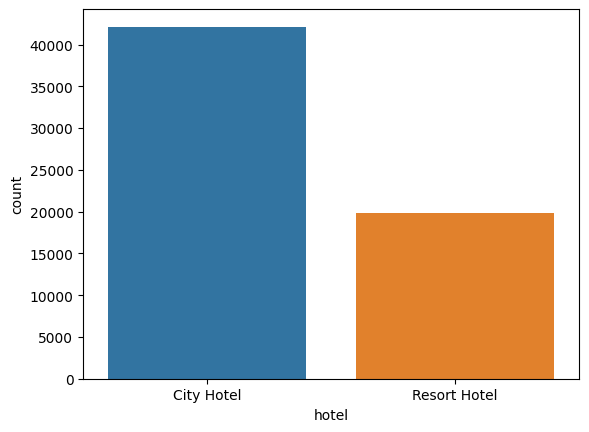

In [94]:
sns.countplot(x='hotel', data=cualitativas)

<Axes: xlabel='customer_type', ylabel='count'>

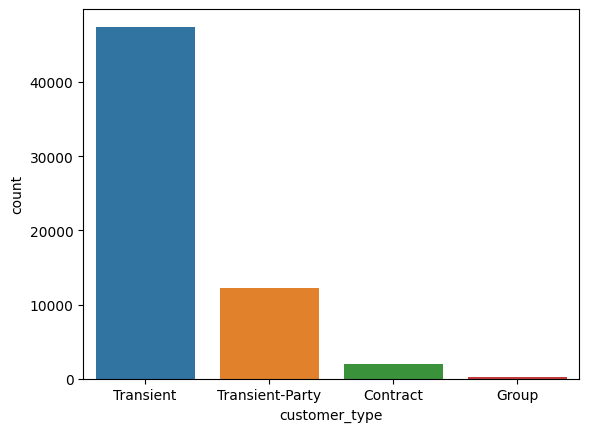

In [95]:
sns.countplot(x='customer_type', data=cualitativas)

<Axes: xlabel='deposit_type', ylabel='count'>

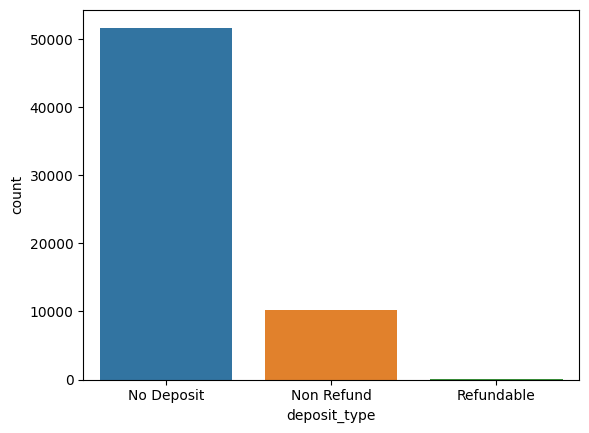

In [96]:
sns.countplot(x='deposit_type', data=cualitativas)

<Axes: xlabel='distribution_channel', ylabel='count'>

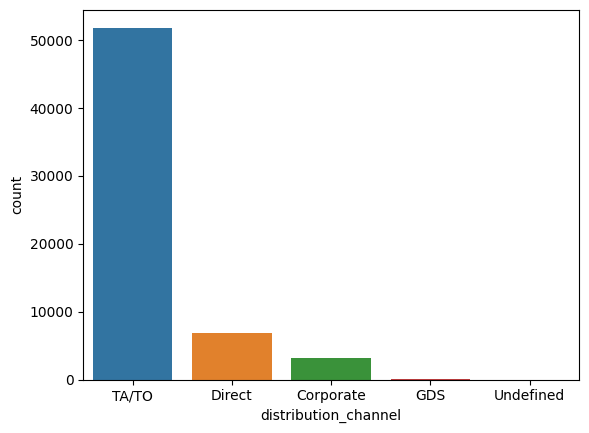

In [97]:
sns.countplot(x='distribution_channel', data=cualitativas)

[Text(0, 0, 'Online TA'),
 Text(1, 0, 'Groups'),
 Text(2, 0, 'Offline TA/TO'),
 Text(3, 0, 'Direct'),
 Text(4, 0, 'Complementary'),
 Text(5, 0, 'Corporate'),
 Text(6, 0, 'Aviation'),
 Text(7, 0, 'Undefined')]

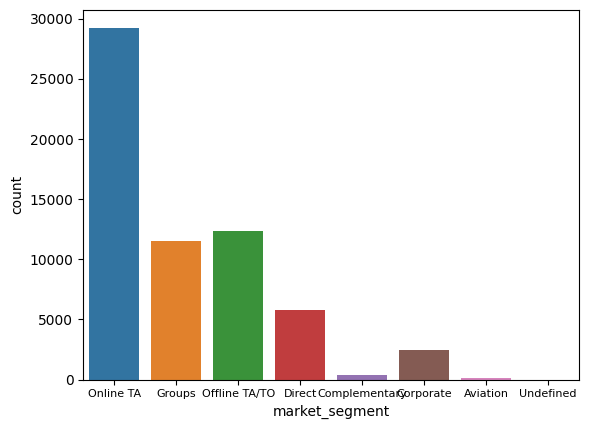

In [98]:
sns.countplot(x='market_segment', data=cualitativas)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<Axes: xlabel='count', ylabel='country'>

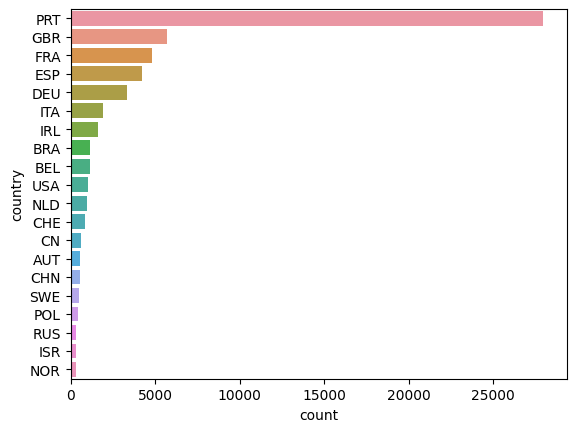

In [99]:
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

<Axes: xlabel='value', ylabel='Count'>

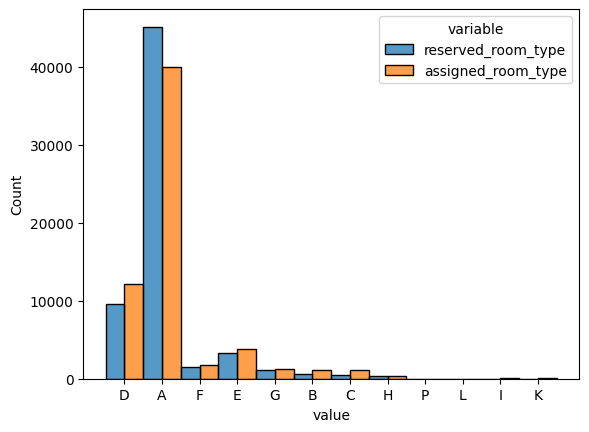

In [100]:
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')

<Axes: xlabel='is_repeated_guest', ylabel='count'>

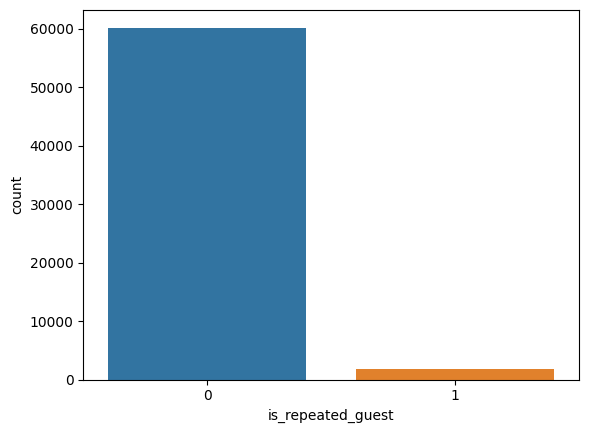

In [101]:
sns.countplot(x='is_repeated_guest', data=cualitativas)

<Axes: xlabel='meal', ylabel='count'>

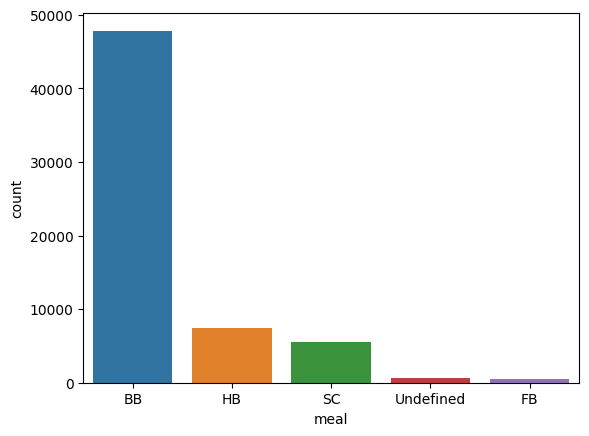

In [102]:
sns.countplot(x='meal', data=cualitativas)

<Axes: xlabel='is_canceled', ylabel='count'>

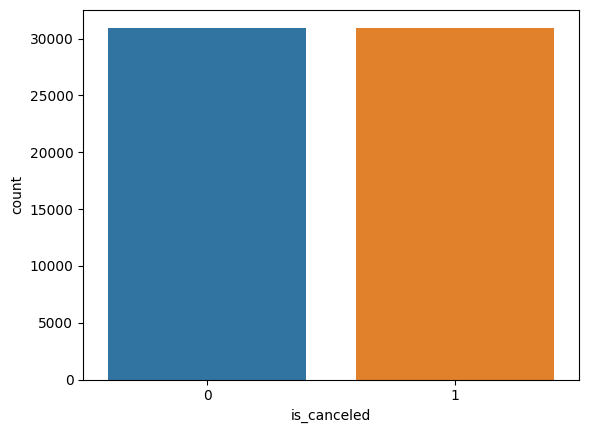

In [103]:
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

Ahora vemos la distribucion de las variables cuantitativas

<Axes: xlabel='lead_time', ylabel='Count'>

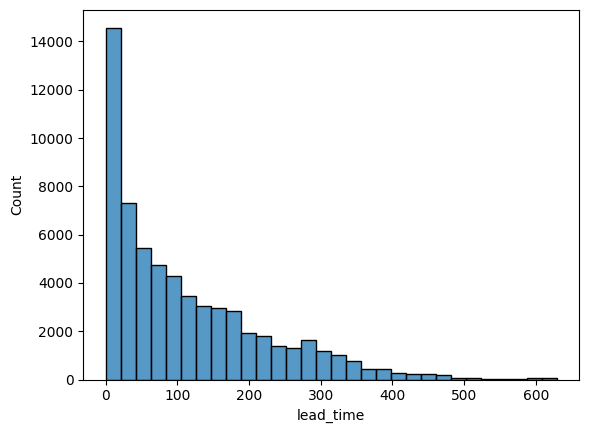

In [104]:
sns.histplot(hotel['lead_time'], bins=30)

<Axes: xlabel='arrival_date_year', ylabel='count'>

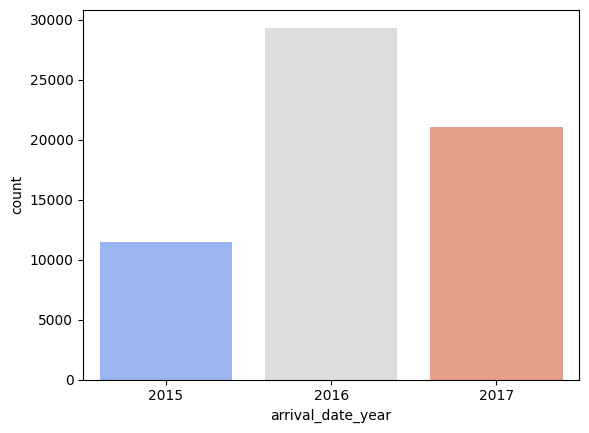

In [105]:
sns.countplot(x='arrival_date_year', data = cuantitativas, palette='coolwarm')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31')]

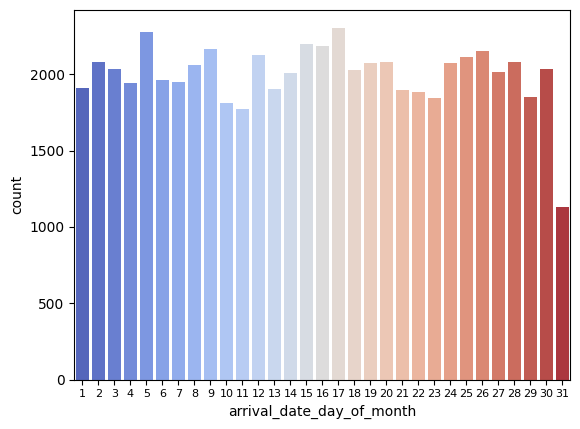

In [106]:
sns.countplot(x='arrival_date_day_of_month', data = cuantitativas, palette='coolwarm')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<Axes: xlabel='stays_in_weekend_nights', ylabel='count'>

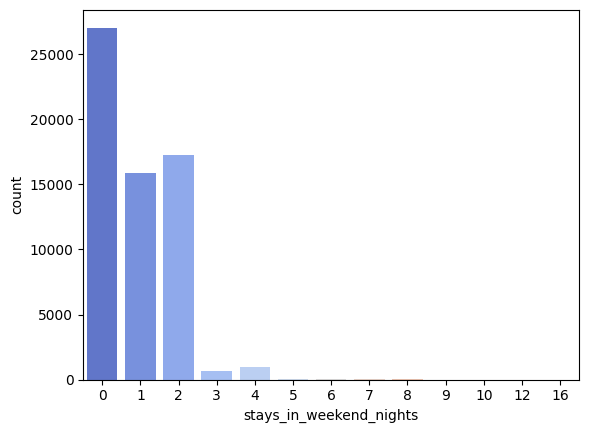

In [107]:
sns.countplot(x='stays_in_weekend_nights', data = cuantitativas, palette='coolwarm')

<Axes: xlabel='stays_in_week_nights', ylabel='count'>

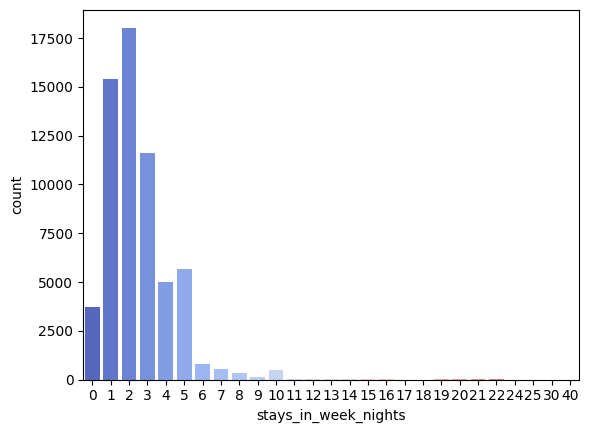

In [108]:
sns.countplot(x='stays_in_week_nights', data = cuantitativas, palette='coolwarm')

<Axes: xlabel='adults', ylabel='count'>

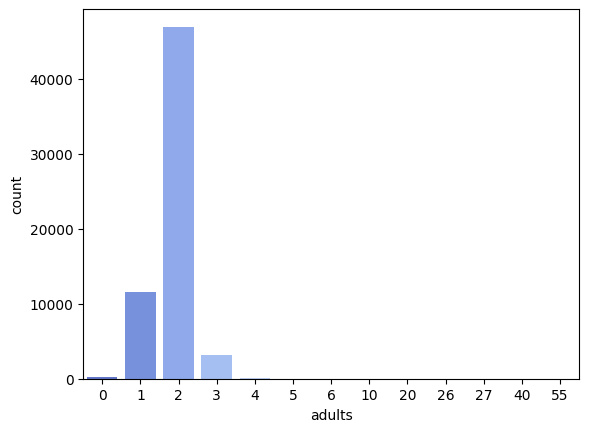

In [109]:
sns.countplot(x='adults', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='children', ylabel='count'>

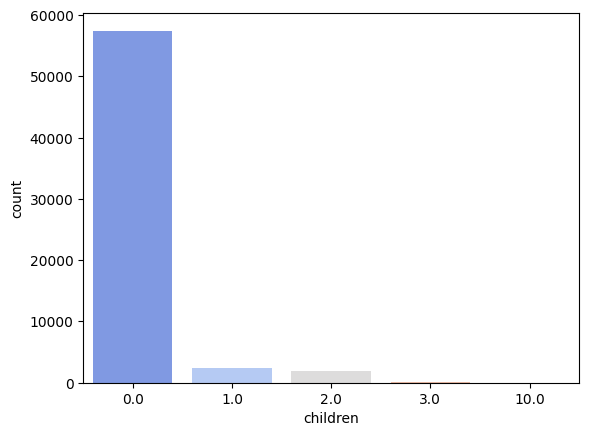

In [110]:
sns.countplot(x='children', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='babies', ylabel='count'>

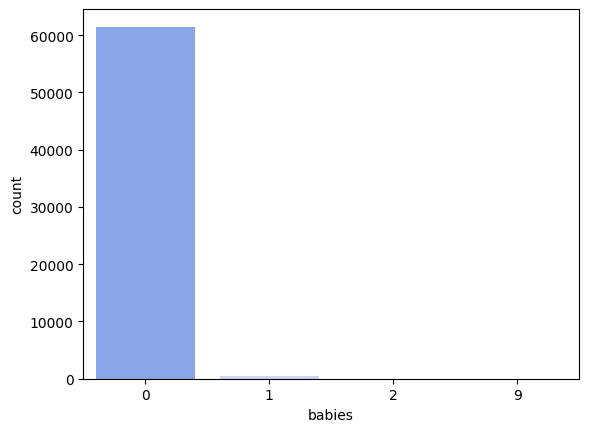

In [111]:
sns.countplot(x='babies', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='is_repeated_guest', ylabel='count'>

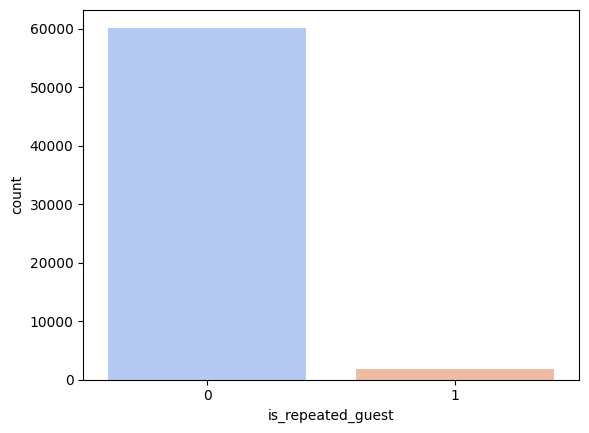

In [112]:
sns.countplot(x='is_repeated_guest', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='previous_cancellations', ylabel='count'>

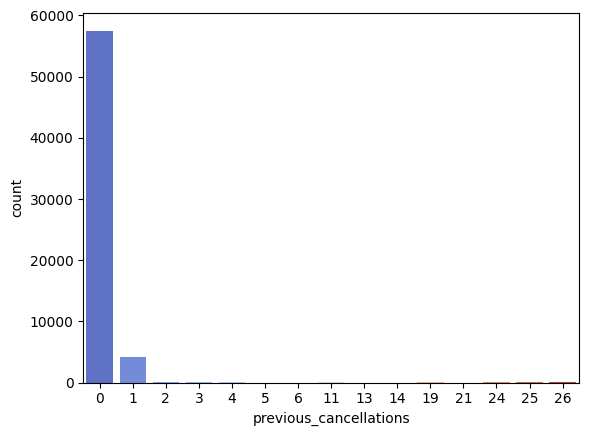

In [113]:
sns.countplot(x='previous_cancellations', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

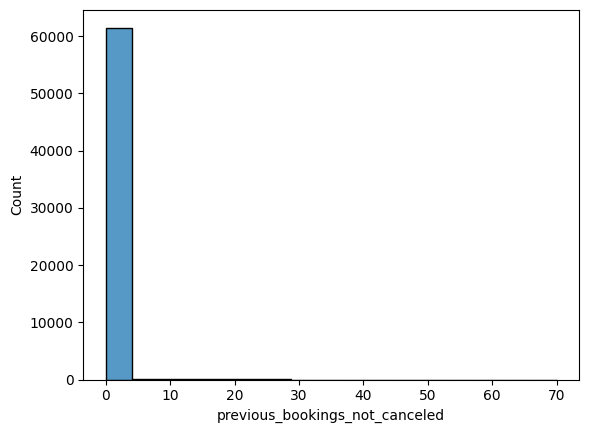

In [114]:
sns.histplot(x='previous_bookings_not_canceled', data=cuantitativas)

<Axes: xlabel='booking_changes', ylabel='count'>

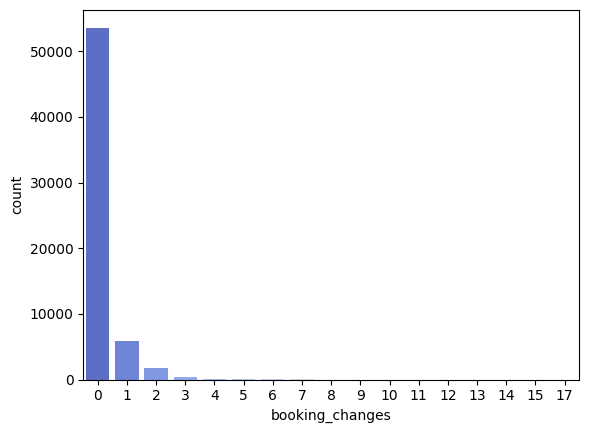

In [115]:
sns.countplot(x='booking_changes', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

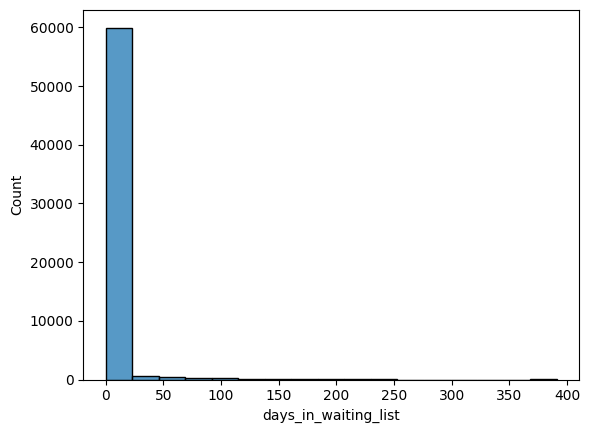

In [116]:
sns.histplot(x='days_in_waiting_list', data=cuantitativas)

C:\Users\davies\AppData\Local\Temp\ipykernel_4976\3372864036.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='adr', data=cuantitativas, palette = 'coolwarm', bins=30)


<Axes: xlabel='adr', ylabel='Count'>

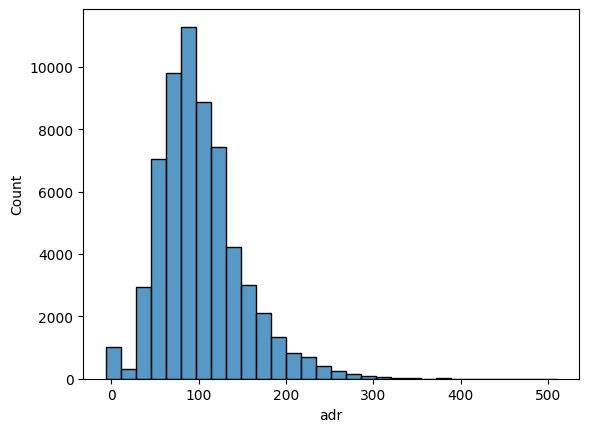

In [117]:
sns.histplot(x='adr', data=cuantitativas, palette = 'coolwarm', bins=30)

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

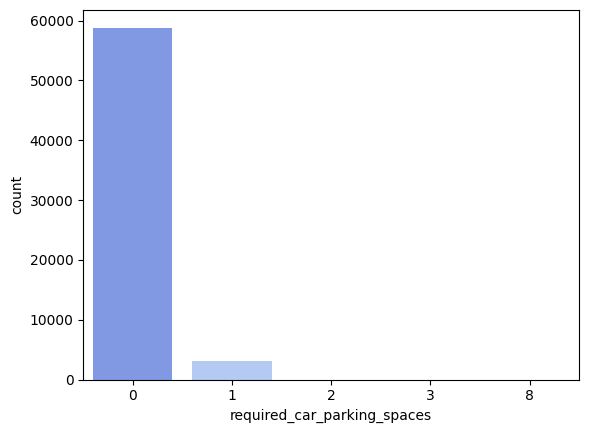

In [118]:
sns.countplot(x='required_car_parking_spaces', data=cuantitativas, palette = 'coolwarm')

<Axes: xlabel='total_of_special_requests', ylabel='count'>

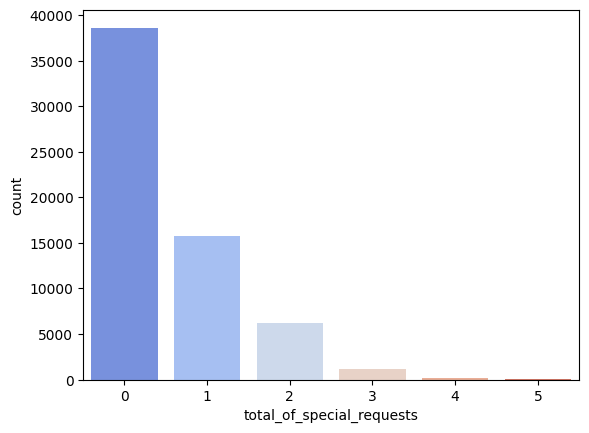

In [119]:
sns.countplot(x='total_of_special_requests', data=cuantitativas, palette = 'coolwarm')

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [120]:
matriz_corr = hotel.corr()
matriz_corr

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

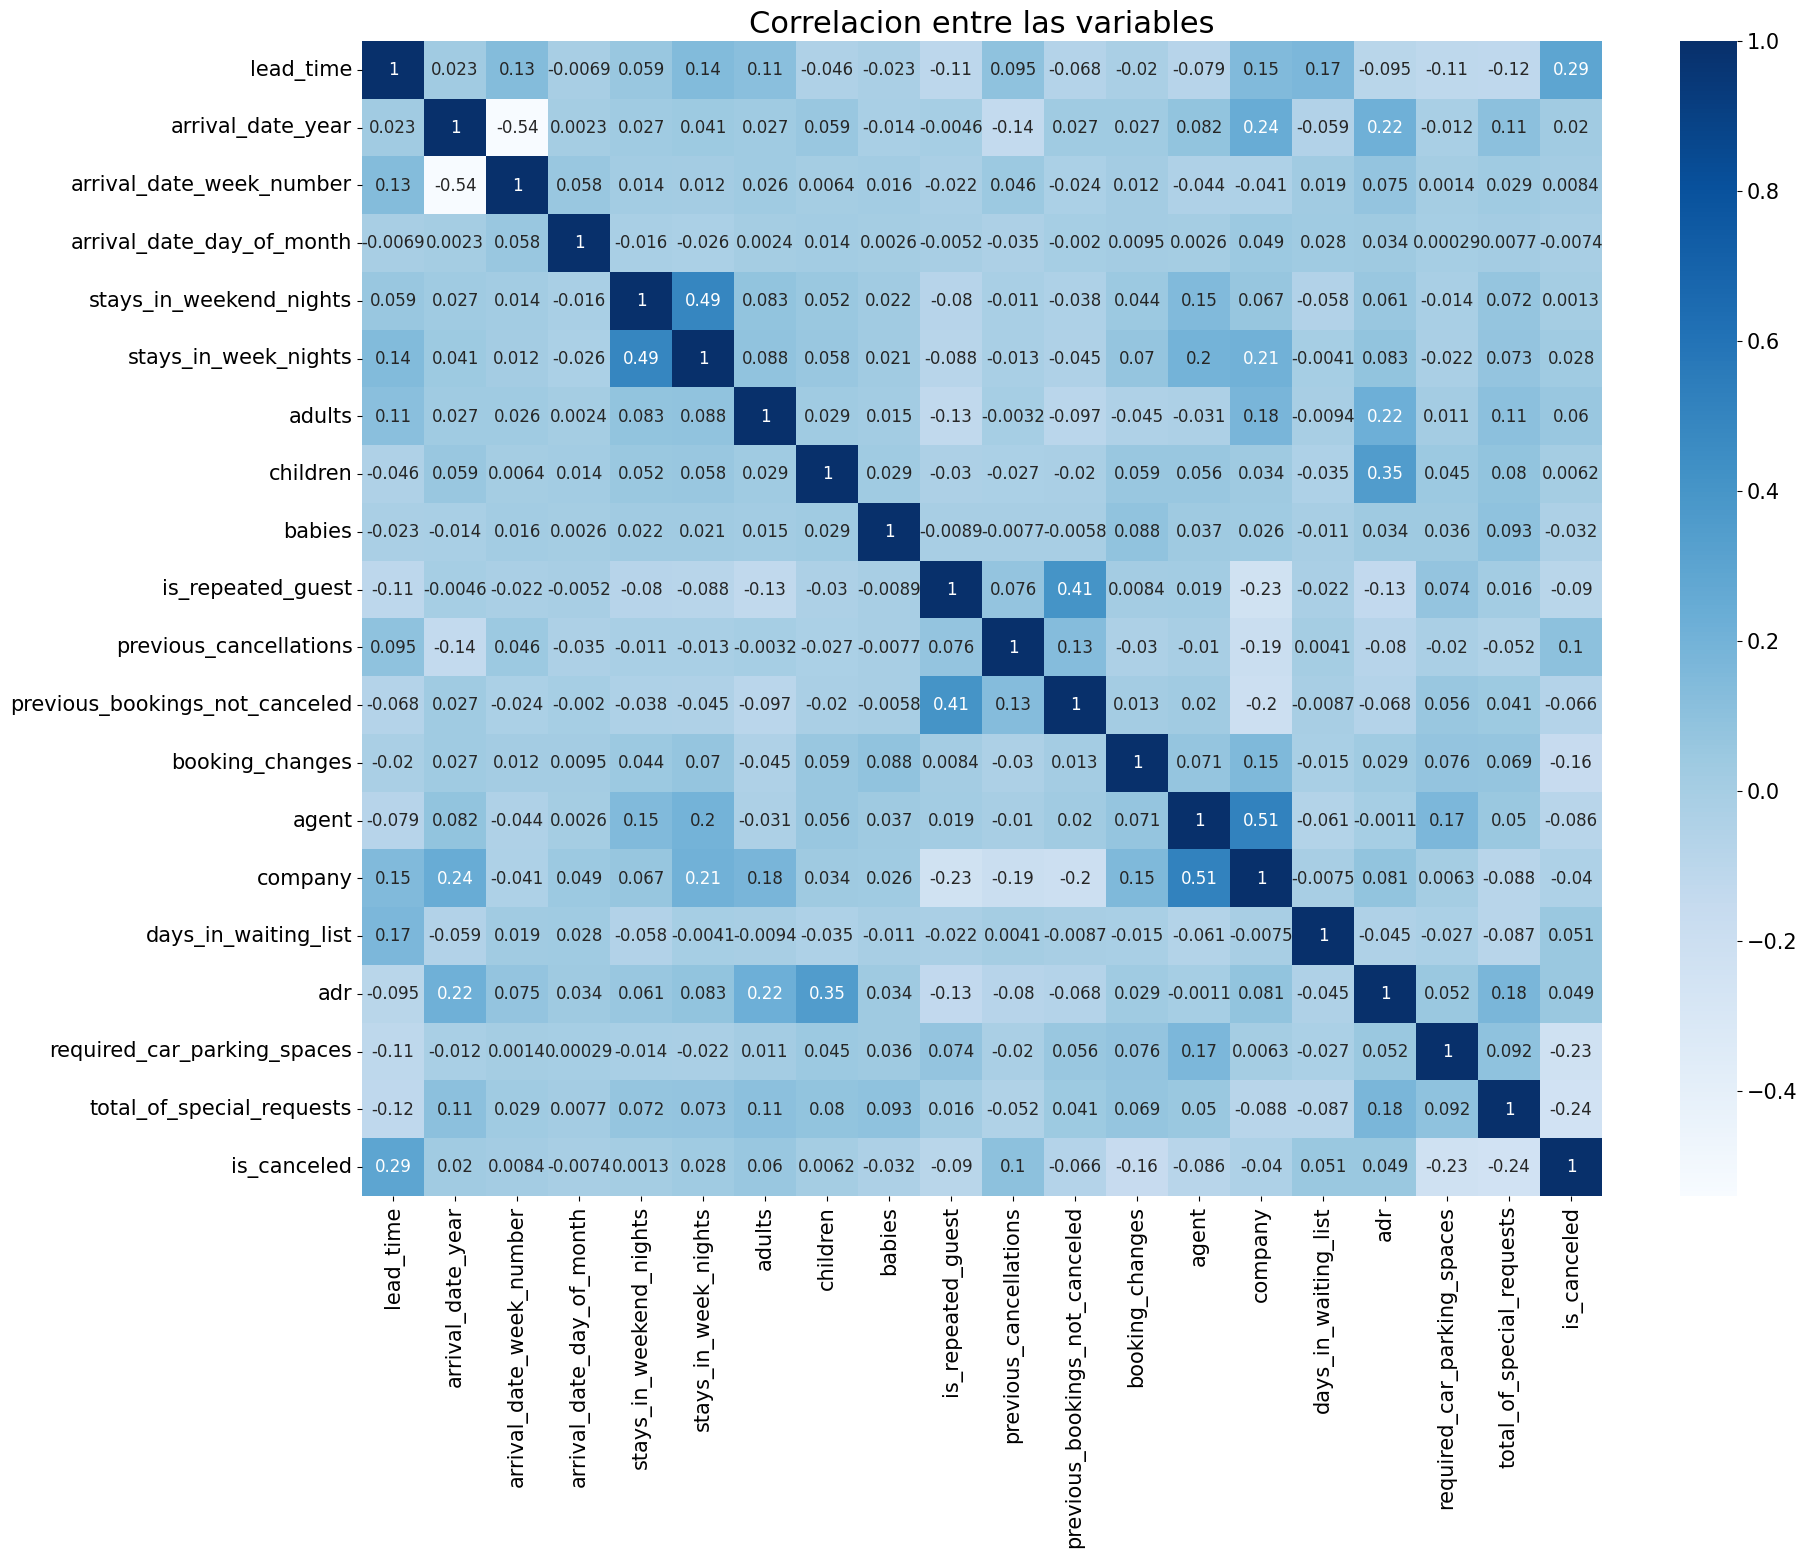

In [121]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(data = matriz_corr, annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

No hay variables que tengan una correlacion demasiado alta, es decir, muy cercana a 1. Esto es bueno, ya que no hay variables que esten muy correlacionadas entre si.
Igualmente veremos mas de cerca aquellas variables que tengan un poco de correlacion. 

Las correlaciones con el target 'is_canceled' se analizan más adelante.

Vamos a considerar las correlaciones mayores a 0.3:
- `'stays_in_weekend_nights'` y `'stays_in_week_nights'`
- `'previous_bookings_not_canceled'` y `'is_repeated_guest'`
- `'children'` y `'adr'`

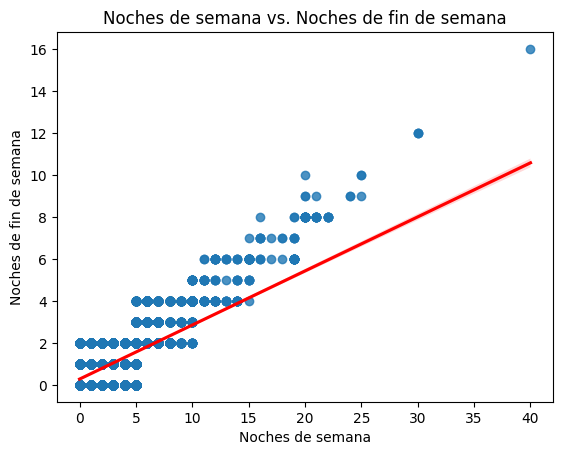

In [122]:
sns.regplot(x=hotel['stays_in_week_nights'], y=hotel['stays_in_weekend_nights'], line_kws={'color':'red'}).set(xlabel='Noches de semana', ylabel='Noches de fin de semana', title='Noches de semana vs. Noches de fin de semana')
plt.show()

Vemos que poseen una correlacion positiva como también habíamos visto en la matriz de correlaciones.

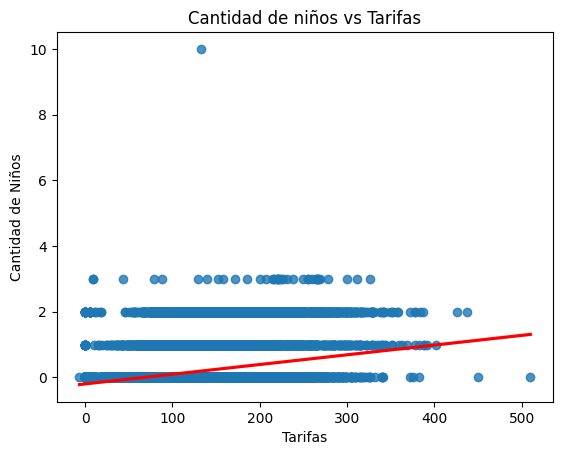

In [123]:
sns.regplot(x=hotel['adr'], y= hotel['children'], line_kws={'color':'red'}).set(xlabel='Tarifas', ylabel='Cantidad de Niños', title= 'Cantidad de niños vs Tarifas')
plt.show()

También poseen una correlacion positiva.

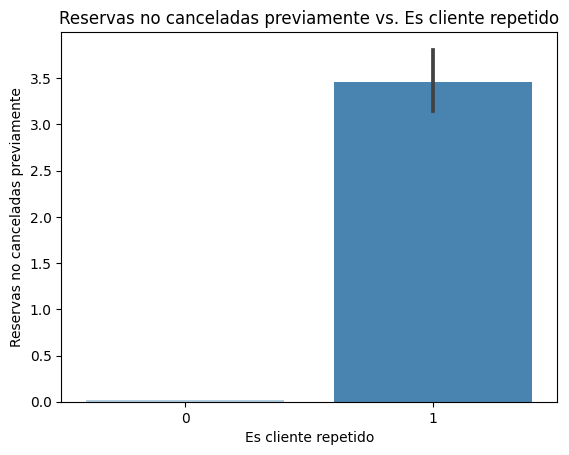

In [124]:
sns.barplot(x=hotel['is_repeated_guest'], y=hotel['previous_bookings_not_canceled'],data=hotel, palette ='Blues').set(xlabel='Es cliente repetido', ylabel='Reservas no canceladas previamente', title= 'Reservas no canceladas previamente vs. Es cliente repetido') 
plt.show()

También podemos ver que hay una correlacion entre estas dos variables ya que las barras tienen una diferencia de altura significativa.

#### Relación de variables con el target

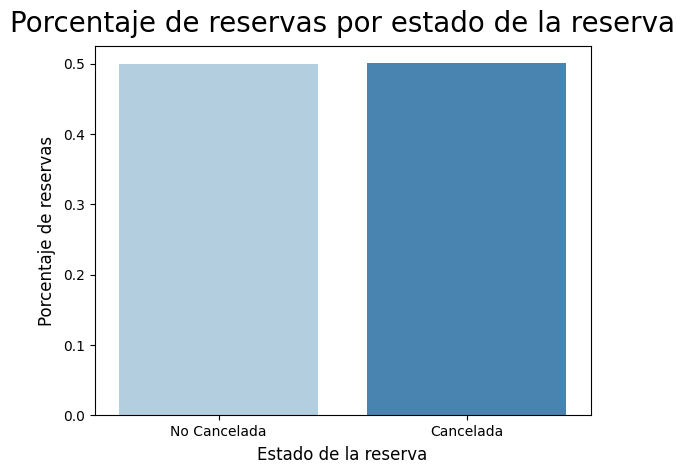

In [125]:
plt.title("Porcentaje de reservas por estado de la reserva", fontsize = 20, pad = 10)
sns.barplot(x=hotel['is_canceled'].unique(), y=hotel['is_canceled'].value_counts(normalize=True), palette='Blues')
plt.xlabel("Estado de la reserva", fontsize = 12, labelpad = 5)
plt.ylabel("Porcentaje de reservas", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['No Cancelada', 'Cancelada']);

Podemos ver que aproximadamente el 50% de las reservas fueron canceladas.

Ahora me quedo solo con las correlaciones entre las variables y nuestro target ``'is_canceled'``

In [126]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


Las grafico también en un heatmap para verlas con mayor claridad

Text(0.5, 1.0, 'Correlacion entre las variables y el target')

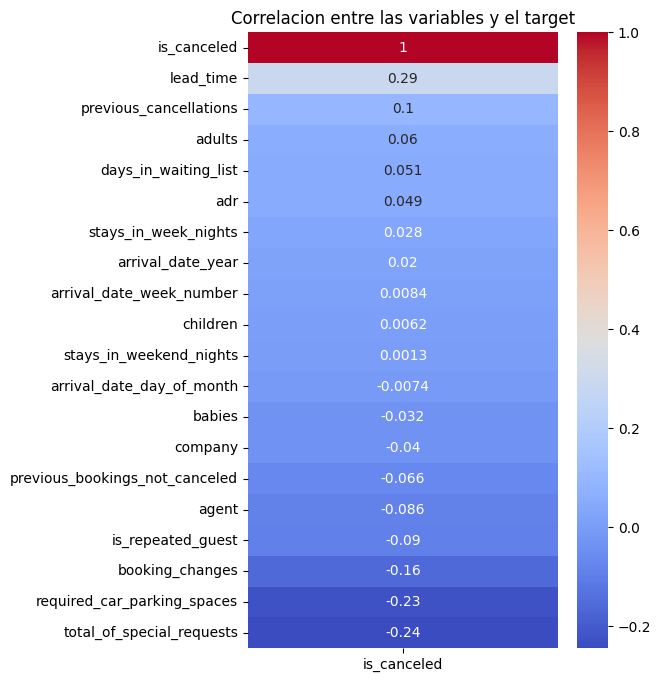

In [127]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(correlacion[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

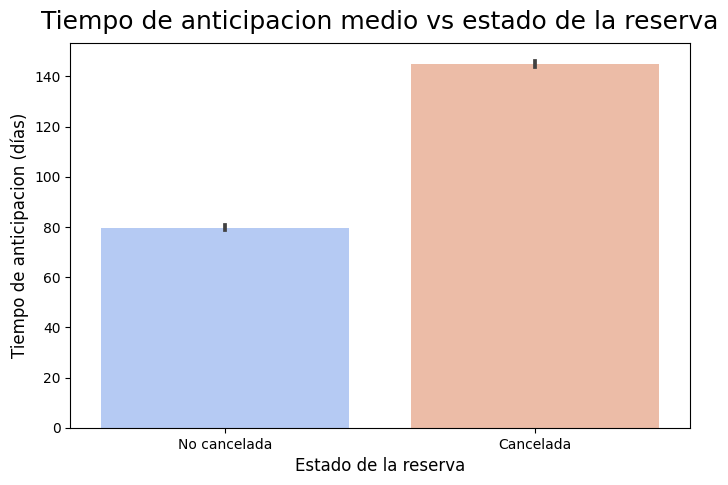

In [128]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

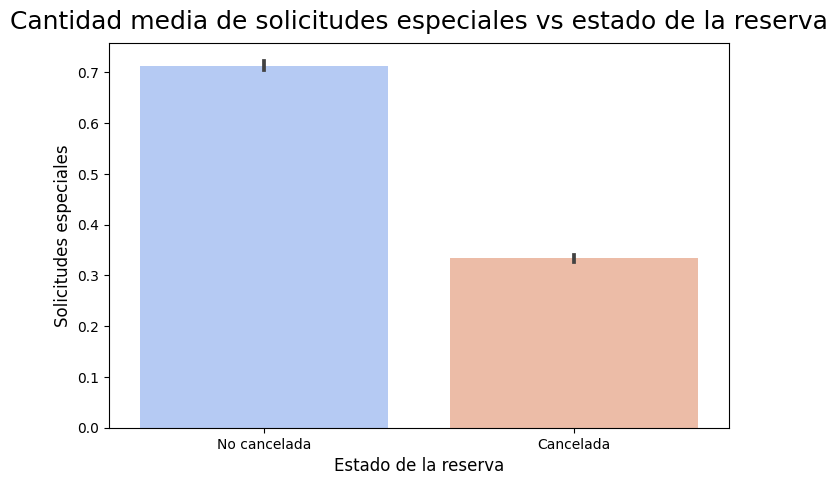

In [129]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

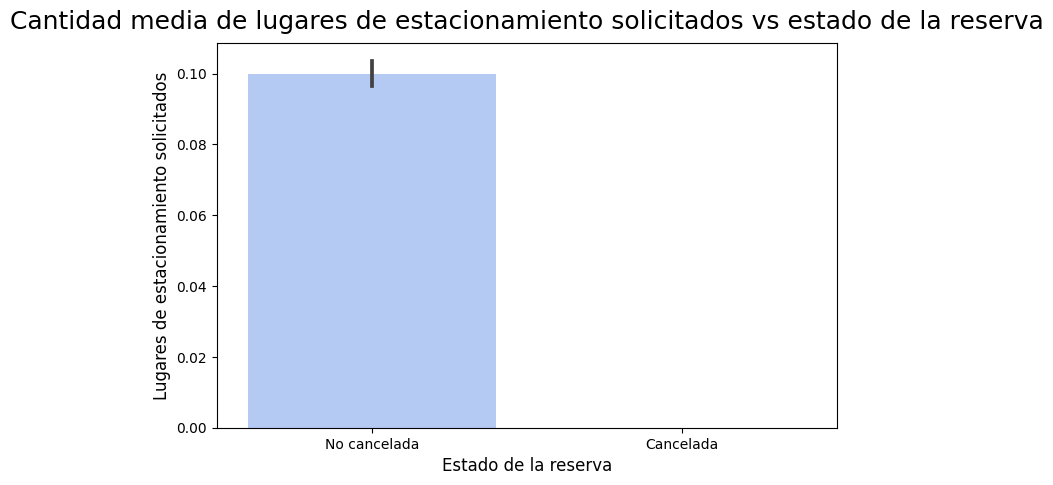

In [130]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

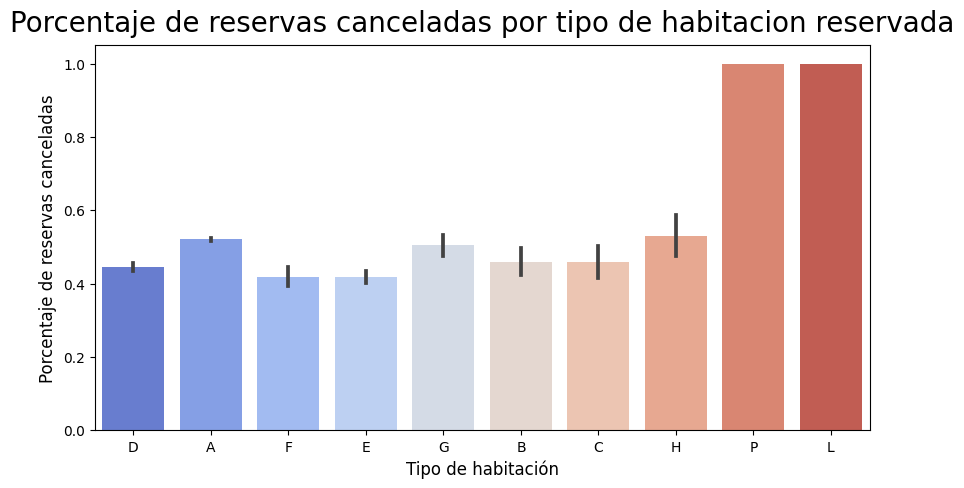

In [131]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

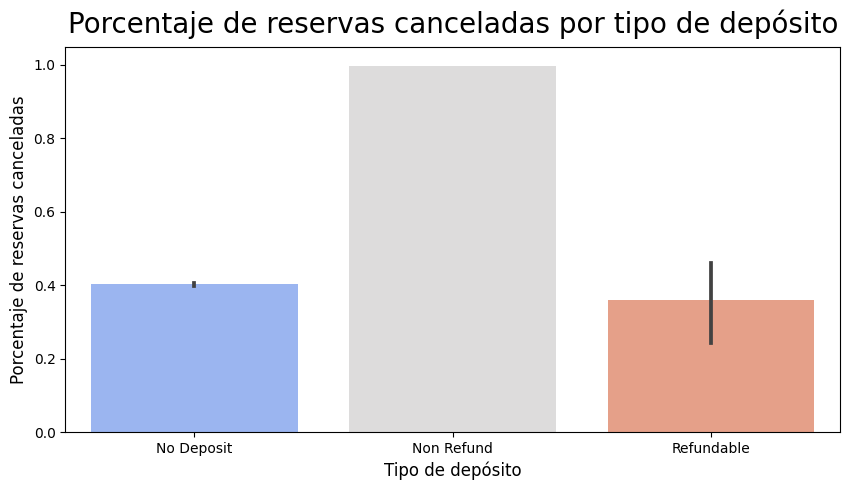

In [132]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

<Axes: xlabel='customer_type', ylabel='count'>

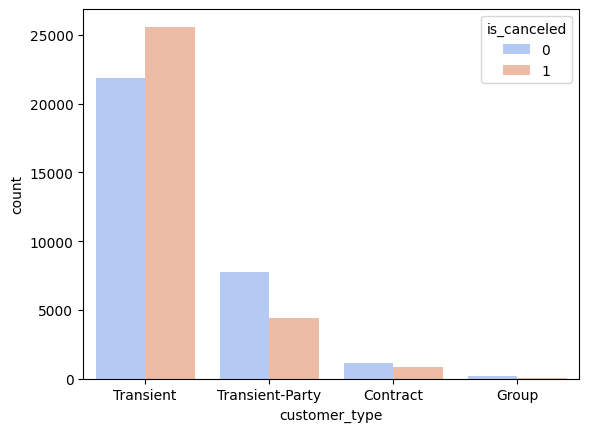

In [133]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [134]:
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

is_canceled,0,1
customer_type,,
Transient,0.460789,0.539211
Contract,0.568126,0.431874
Transient-Party,0.635766,0.364234
Group,0.825095,0.174905


Podemos ver que el tipo de cliente que más cancela sus reservas es el cliente Transient-Party, seguido por el Transient y el Contract. El Group es el que menos cancela sus reservas.

<Axes: xlabel='is_repeated_guest', ylabel='count'>

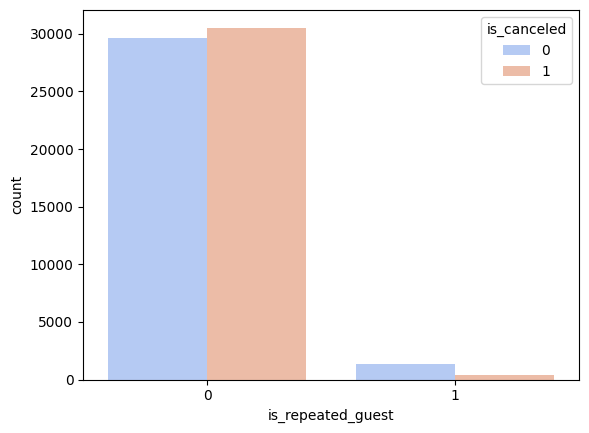

In [135]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

In [136]:
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

is_canceled,0,1
is_repeated_guest,,
0,0.492572,0.507428
1,0.766878,0.233122


Podemos ver que si un cliente ya ha reservado en el hotel, es menos probable que cancele su reserva y si no ha reservado en el hotel, es más probable que cancele su reserva.

### **Data cleaning**

#### Tipos de datos

Verificamos los tipos de datos de las variables del dataset.

In [137]:
hotel.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Vemos que hay variables que tienen un tipo de dato inconsistente con su contenido.
- ``children`` debería ser de tipo numérico, no tiene sentido que sea de tipo float.
- ``agent`` y ``company`` deberían ser de tipo numérico, ya que son categóricas, representan a distintos agentes y vendedores.


Realizamos la conversión de tipos de datos.

In [138]:
hotel['children'] = hotel['children'].astype('int')

hotel['agent'] = hotel['agent'].astype('int')

hotel['company'] = hotel['company'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Ingeniería de features

En primer lugar, observamos que tenemos tres columnas distintas que representan el año, mes y día de la fecha de llegada de los clientes. Podemos unificarlas en una sola columna, que represente la fecha de llegada.

Combinamos las columnas `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'` en una sola columna `'arrival_date'` de tipo datetime, y dropeamos las columnas anteriores.

In [139]:
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str))

hotel.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

Verificamos que se hayan convertido correctamente:

In [140]:
hotel.arrival_date

0       2016-09-05
1       2015-10-31
2       2016-10-13
3       2016-12-12
4       2017-03-19
           ...    
61908   2017-01-27
61909   2016-09-02
61910   2017-05-08
61911   2015-10-10
61912   2016-04-17
Name: arrival_date, Length: 61913, dtype: datetime64[ns]

### **Visualización de los datos**

En esta sección exploraremos los datos visualmente, para encontrar relaciones entre variables.

### **Datos faltantes**

Como los modelos de ML no pueden trabajar con datos faltantes, debemos tratarlos de alguna forma.

#### Análisis

Obtengo una tabla con la cantidad y el porcentaje de nulos por columna:

In [141]:

# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null

,Columna,Cant. nulos,% nulos
3,company,58761,94.909
2,agent,7890,12.744
1,country,221,0.357
0,children,4,0.006


Entonces, hay 4 columnas que tienen valores nulos:
- ``children`` tiene 4 valores nulos (0,01%)
- ``country`` tiene 221 valores nulos (0,36%)
- ``agent`` tiene 7890 valores nulos (12,7%)
- ``company`` tiene 58761 valores nulos (94,9%)

Grafico los porcentajes de nulos por columna:

<Axes: xlabel='Columna', ylabel='% nulos'>

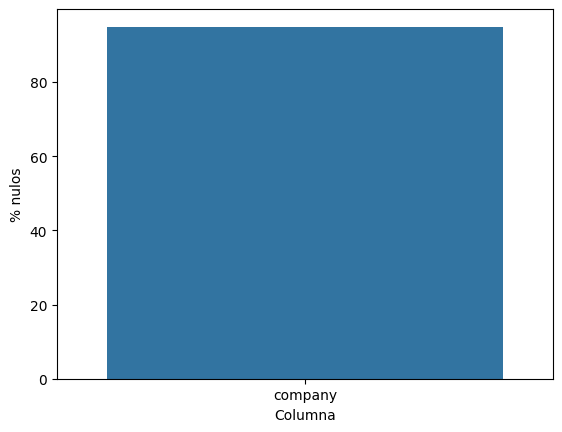

In [142]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


<Axes: xlabel='Columna', ylabel='% nulos'>

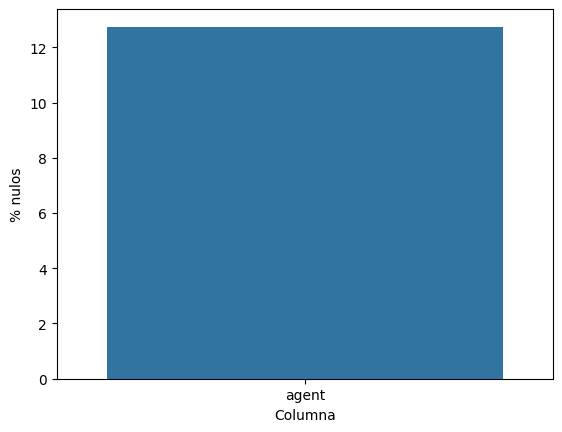

In [143]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


<Axes: xlabel='Columna', ylabel='% nulos'>

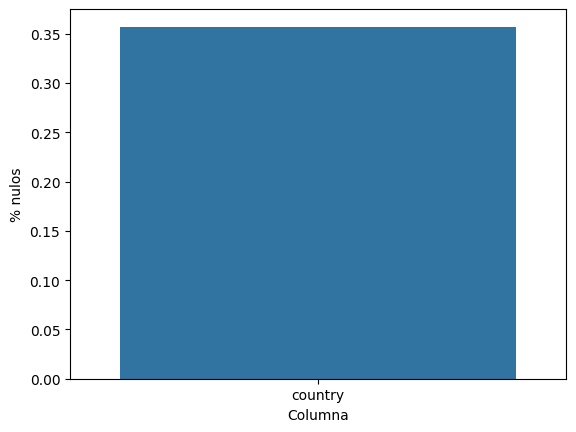

In [144]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


<Axes: xlabel='Columna', ylabel='% nulos'>

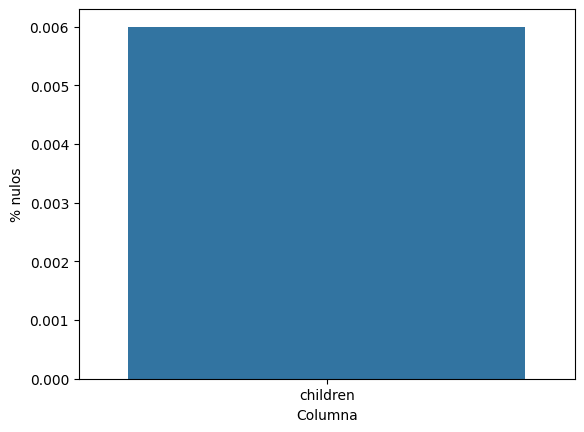

In [145]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


#### Revisión y decisión

##### Nulos en ``children``

Según el paper, no deberían existir valores faltantes. Es raro entonces encontrar que 4 observaciones de la columna ``children`` son raros. Por el ínfimo porcentaje que estos representan, podemos simplemente eliminar las filas que tienen este dato faltante, sin mayores consecuencias.

In [146]:
hotel.dropna(subset=['children'], inplace=True)

In [147]:
print("Cantidad de registros", hotel.shape[0])

Cantidad de registros 61909


Confirmamos que se eliminaron 4 registros del dataset.

##### Nulos en ``country``

El paper también da información al respecto de los valores faltantes en la columna ``country``:
> It is also common for hotels not to know the correct nationality of the customer until the moment of check-in.

Nos aclaran que es común que los hoteles no conozcan la nacionalidad del cliente hasta el momento del check-in. Por ello, podemos asumir que los valores faltantes en esta columna son válidos, y se pueden imputar por un valor que represente este desconocimiento.

Esto resuelve el problema a fines del análisis de los datos, pero no para el entrenamiento del modelo de ML. Una decisión deberá tomarse respecto a estos datos para evitar un sesgo incorrecto en el entrenamiento del modelo, considerando que nacionalidades conocidas recién al momento del check-in bien pudieron haber sido originalmente registradas como desconocidas.

Este hecho puede influenciar la predicción del modelo de forma negativa, insertando un sesgo incorrecto en el entrenamiento del modelo.

Reemplazamos los valores nulos de la columna ``country`` por el valor 'Desconocido'.

In [148]:
# Replace null values in 'country' column with 'Unknown'
hotel['country'].fillna('Desconocido', inplace=True)

##### Nulos en ``company`` y ``agent``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o personalmente; y no específicamente a través de cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que otra reserva realizada por otro agente, también se cancelará. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Este análisis corresponde a la etapa de ingeniería de *features*. Por ahora, y con el propósito de avanzar con la limpieza de los datos, reemplazaremos los valores por 'Sin agente' y 'Sin compañía', según corresponda.

In [149]:
hotel['agent'].fillna('Sin agente', inplace=True)

In [150]:
# Replace null values in 'company' column with 'Sin compania'
hotel['company'].fillna('Sin compania', inplace=True)

Finalmente, verificamos que ya no existan valores nulos en el dataset.

In [151]:
hotel.isna().sum().sum()

0

Nuestro dataset parcial ``hotel`` está libre de valores faltantes o nulos.

#### Comparaciones

Una vez eliminados o tratados valores nulos, es necesario volver a examinar la distribución de los datos, para verificar que no hayan sido alterados de forma significativa.

Las columnas modificadas fueron ``country``, ``children``, ``agent`` y ``company``. Veamos cómo se distribuyen ahora.

Por la gran cantidad de países únicos en el dataset, no es posible graficarlos todos. Por ello, graficamos los 15 países con mayor cantidad de registros.

<Axes: xlabel='country', ylabel='count'>

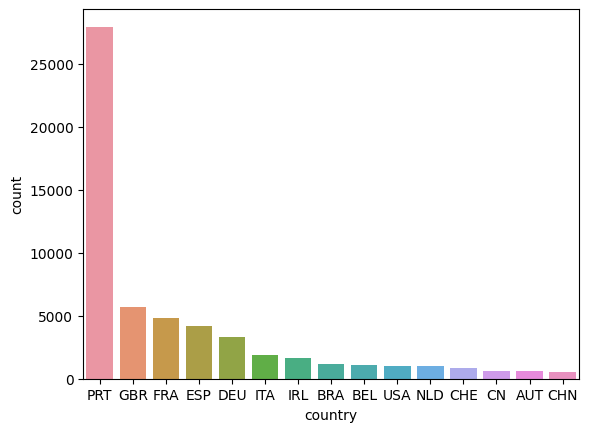

In [152]:
sns.countplot(x='country', data=hotel, order=hotel['country'].value_counts().iloc[:15].index)

No hay cambios apreciables en la distribución de los datos, porque los valores faltantes eran pocos, y fueron corregidos sin alterar los demás registros.

Ahora la distribución de la columna ``children``:

<Axes: xlabel='children', ylabel='count'>

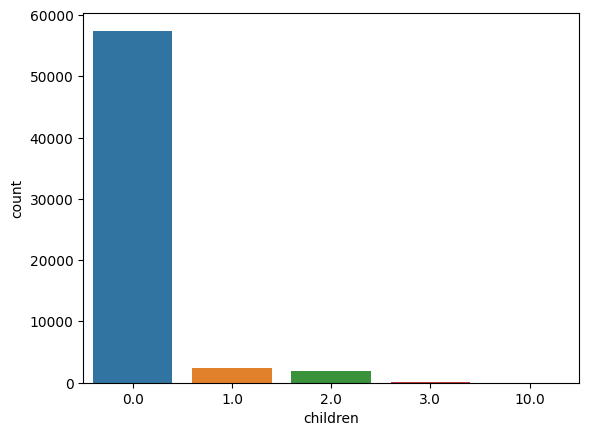

In [153]:
sns.countplot(x='children', data=hotel)

La distribución no cambiar. La cantidad de registros eliminados (4) en irrelevante.

Respecto a la columna ``company``, la distribución es la siguiente:

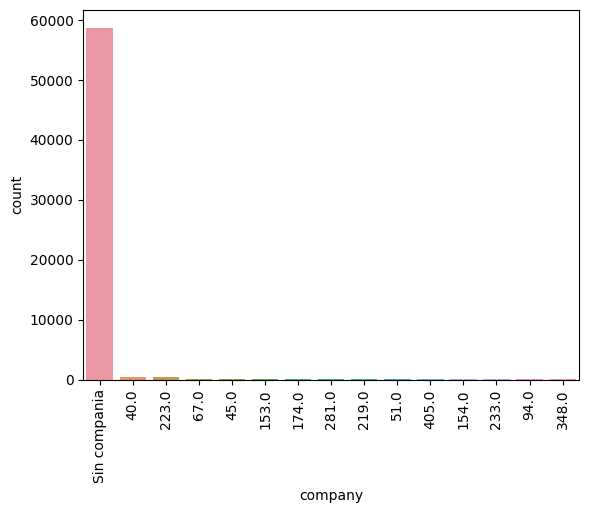

In [154]:
sns.countplot(x='company', data=hotel, order=hotel['company'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso la distribución se altera totalmente. Al tener en cuenta los valores faltantes, el valor "Sin compañía" (que eran los nulos), pasó a estar muy representada.

Respecto a la columna ``agent``, la distribución es la siguiente:

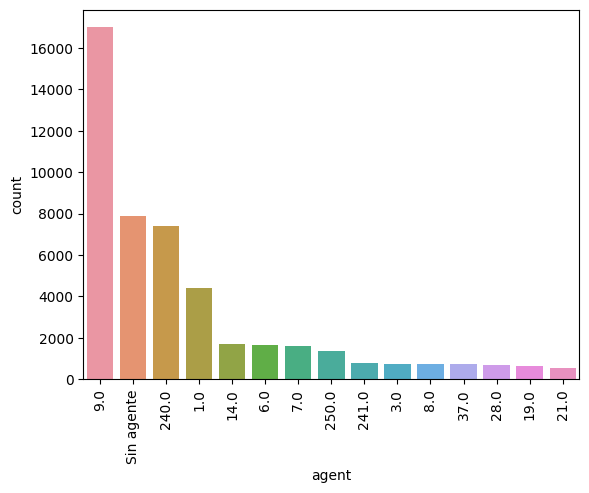

In [155]:
sns.countplot(x='agent', data=hotel, order=hotel['agent'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso también se altera la distribución, vemos que "Sin agente" pasó al segundo puesto, pero el agente "índice 9" sigue en el primer lugar, y son comparables en el orden de magnitud.

Concluimos que los cambios realizados no alteraron la distribución de los datos de forma significativa, pero pusieron un evidencia datos que se encontraban "ocultos" por ser nulos.

### **Valores atípicos**

#### Análisis univariado

In [212]:
hotel_cpy = hotel.copy()

##### Outliers en ``'adr'``

Primero vamos a tratar de identificar outliers univariados mediante el análisis de boxplots.

<Axes: ylabel='adr'>

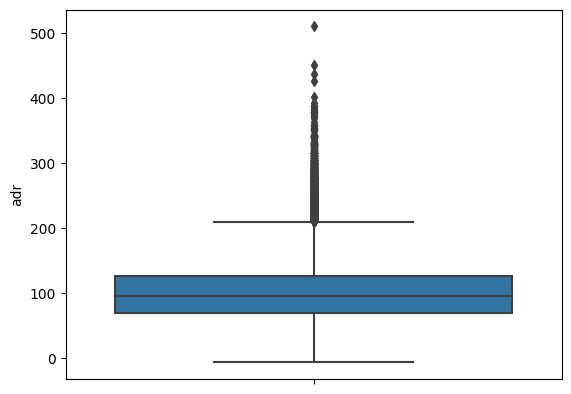

In [156]:
sns.boxplot(y=hotel.adr)

In [157]:
hotel.adr.agg(['min','max']).reset_index()

,index,adr
0,min,-6.38
1,max,510.00


Podemos ver en el gráfico que la variable ``'adr'`` parece tener outliers. Además, sabemos que su mínimo es -6.38 y su máximo es 510.

In [158]:
#Cuartiles
Q1_altura = np.quantile(hotel.adr,0.25)
Q3_altura = np.quantile(hotel.adr,0.75)

#Rango intercuartil
IQR_altura = Q3_altura-Q1_altura

out_inf = Q1_altura-1.5*IQR_altura
out_sup = Q3_altura+1.5*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -14.0 son outliers moderados inferiores.
Valores por arriba de 210.0 son outlier moderados superiores.


In [213]:
#Observación anómala
outlier=hotel[hotel['adr']>210].sort_values(by='adr',ascending=False)
outlier

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date
55460,City Hotel,0,19,0,1,1,0.0,0,BB,ITA,...,No Deposit,159.0,Sin compania,0,Transient,510.00,0,0,0,2017-05-09
50240,Resort Hotel,378,31,4,10,2,0.0,0,BB,PRT,...,No Deposit,314.0,Sin compania,0,Transient,450.00,0,0,1,2017-08-01
54002,Resort Hotel,59,33,2,4,2,2.0,0,FB,PRT,...,No Deposit,250.0,Sin compania,0,Transient,437.00,0,0,1,2017-08-13
8690,Resort Hotel,31,31,2,6,2,2.0,0,Undefined,PRT,...,No Deposit,250.0,Sin compania,0,Transient,426.25,0,2,0,2017-08-01
60071,Resort Hotel,104,33,2,3,3,1.0,0,HB,ESP,...,No Deposit,240.0,Sin compania,0,Transient,402.00,0,1,0,2017-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,Resort Hotel,2,32,0,2,2,2.0,0,BB,PRT,...,No Deposit,241.0,Sin compania,0,Transient,210.51,1,1,0,2016-08-04
24803,Resort Hotel,249,33,2,6,3,0.0,0,HB,PRT,...,No Deposit,Sin agente,Sin compania,0,Transient,210.50,0,3,1,2017-08-19
2582,Resort Hotel,35,31,2,5,2,0.0,0,BB,IRL,...,No Deposit,240.0,Sin compania,0,Transient,210.43,0,0,1,2016-07-30
13327,Resort Hotel,83,30,2,8,2,0.0,0,HB,GBR,...,No Deposit,Sin agente,Sin compania,0,Transient,210.42,0,0,0,2016-07-19


In [159]:
out_inf = Q1_altura-3*IQR_altura
out_sup = Q3_altura+3*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers severos inferiores.')
print('Valores por arriba de', out_sup, 'son outlier severos superiores.')

Valores por debajo de -98.0 son outliers severos inferiores.
Valores por arriba de 294.0 son outlier severos superiores.


In [211]:
#Observación anómala
outlier=hotel[hotel['adr']>294].sort_values(by='adr', ascending=False)
outlier

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date
55460,City Hotel,0,19,0,1,1,0.0,0,BB,ITA,...,No Deposit,159.0,Sin compania,0,Transient,510.00,0,0,0,2017-05-09
50240,Resort Hotel,378,31,4,10,2,0.0,0,BB,PRT,...,No Deposit,314.0,Sin compania,0,Transient,450.00,0,0,1,2017-08-01
54002,Resort Hotel,59,33,2,4,2,2.0,0,FB,PRT,...,No Deposit,250.0,Sin compania,0,Transient,437.00,0,0,1,2017-08-13
8690,Resort Hotel,31,31,2,6,2,2.0,0,Undefined,PRT,...,No Deposit,250.0,Sin compania,0,Transient,426.25,0,2,0,2017-08-01
60071,Resort Hotel,104,33,2,3,3,1.0,0,HB,ESP,...,No Deposit,240.0,Sin compania,0,Transient,402.00,0,1,0,2017-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30970,City Hotel,44,16,0,3,2,2.0,0,BB,NOR,...,No Deposit,8.0,Sin compania,0,Transient,295.00,0,2,0,2017-04-20
38203,Resort Hotel,109,31,2,5,2,0.0,0,HB,MAR,...,No Deposit,240.0,Sin compania,0,Transient,294.86,0,1,1,2017-07-30
61256,City Hotel,18,19,2,9,2,0.0,0,BB,PRT,...,No Deposit,8.0,Sin compania,0,Transient,294.55,0,1,1,2017-05-10
33083,Resort Hotel,116,32,2,8,2,1.0,0,FB,PRT,...,No Deposit,5.0,Sin compania,0,Transient,294.50,0,2,1,2017-08-09


Considerando estos valores y los max y min de ``'adr'``, podemos ver que tiene outliers superiores tanto moderados como severos, pero no se detectan outliers inferiores.

Ahora probemos calculando el z-score y el z-score modificado

In [214]:
# z-score
media_adr = np.mean(hotel_cpy.adr)
std_adr = np.std(hotel_cpy.adr)
hotel_cpy['z_adr'] = (hotel_cpy.adr - media_adr)/std_adr

In [217]:
hotel_cpy[hotel_cpy['z_adr']>3].sort_values(by='z_adr', ascending=False)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr
55460,City Hotel,0,19,0,1,1,0.0,0,BB,ITA,...,159.0,Sin compania,0,Transient,510.00,0,0,0,2017-05-09,8.535524
50240,Resort Hotel,378,31,4,10,2,0.0,0,BB,PRT,...,314.0,Sin compania,0,Transient,450.00,0,0,1,2017-08-01,7.279104
54002,Resort Hotel,59,33,2,4,2,2.0,0,FB,PRT,...,250.0,Sin compania,0,Transient,437.00,0,0,1,2017-08-13,7.006879
8690,Resort Hotel,31,31,2,6,2,2.0,0,Undefined,PRT,...,250.0,Sin compania,0,Transient,426.25,0,2,0,2017-08-01,6.781770
60071,Resort Hotel,104,33,2,3,3,1.0,0,HB,ESP,...,240.0,Sin compania,0,Transient,402.00,0,1,0,2017-08-17,6.273967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,Resort Hotel,39,35,2,4,2,0.0,0,HB,DEU,...,240.0,Sin compania,0,Transient,246.00,0,2,0,2016-08-24,3.007274
865,Resort Hotel,99,53,2,5,3,1.0,0,BB,FRA,...,240.0,Sin compania,0,Transient,246.00,0,0,0,2016-12-26,3.007274
2391,Resort Hotel,37,32,0,2,2,0.0,0,HB,ESP,...,240.0,Sin compania,0,Transient,246.00,0,2,0,2016-08-05,3.007274
42676,City Hotel,40,33,1,1,2,2.0,0,HB,ESP,...,14.0,Sin compania,0,Transient,245.95,1,0,0,2016-08-13,3.006227


In [218]:
hotel_cpy[hotel_cpy['z_adr']<-3]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr


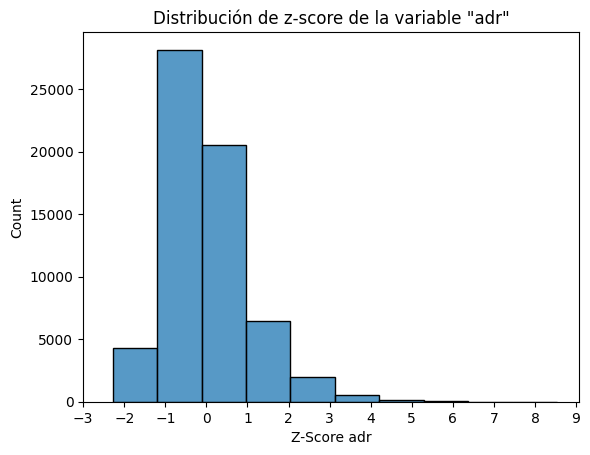

In [219]:
sns.histplot(hotel_cpy.z_adr, bins=10).set(title='Distribución de z-score de la variable "adr"', xlabel='Z-Score adr')

plt.xticks(np.arange(-3, 10, 1))
plt.show()

In [220]:
#z-score modificado
mediana_adr = np.median(hotel_cpy.adr)
MAD = np.median(np.absolute(hotel_cpy.adr-mediana_adr))
hotel_cpy['zm_adr'] = (hotel_cpy.adr - mediana_adr)*0.6745/MAD

In [223]:
hotel_cpy[(hotel_cpy['zm_adr']>3.5)].sort_values(by='zm_adr', ascending=False)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr
55460,City Hotel,0,19,0,1,1,0.0,0,BB,ITA,...,Sin compania,0,Transient,510.00,0,0,0,2017-05-09,8.535524,10.090753
50240,Resort Hotel,378,31,4,10,2,0.0,0,BB,PRT,...,Sin compania,0,Transient,450.00,0,0,1,2017-08-01,7.279104,8.631849
54002,Resort Hotel,59,33,2,4,2,2.0,0,FB,PRT,...,Sin compania,0,Transient,437.00,0,0,1,2017-08-13,7.006879,8.315753
8690,Resort Hotel,31,31,2,6,2,2.0,0,Undefined,PRT,...,Sin compania,0,Transient,426.25,0,2,0,2017-08-01,6.781770,8.054366
60071,Resort Hotel,104,33,2,3,3,1.0,0,HB,ESP,...,Sin compania,0,Transient,402.00,0,1,0,2017-08-17,6.273967,7.464726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35973,City Hotel,5,39,1,1,2,0.0,0,BB,FRA,...,Sin compania,0,Transient,239.00,0,3,0,2016-09-24,2.860692,3.501370
48291,City Hotel,19,32,1,5,3,0.0,0,BB,ESP,...,Sin compania,0,Transient,239.00,1,3,0,2017-08-07,2.860692,3.501370
48351,City Hotel,27,33,1,1,3,0.0,0,BB,ITA,...,Sin compania,0,Transient,239.00,0,1,1,2017-08-14,2.860692,3.501370
9880,Resort Hotel,258,28,2,0,3,1.0,0,BB,BEL,...,Sin compania,0,Transient,239.00,0,1,1,2017-07-09,2.860692,3.501370


In [168]:
hotel_cpy[(hotel_cpy['zm_adr']<-3.5)]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr


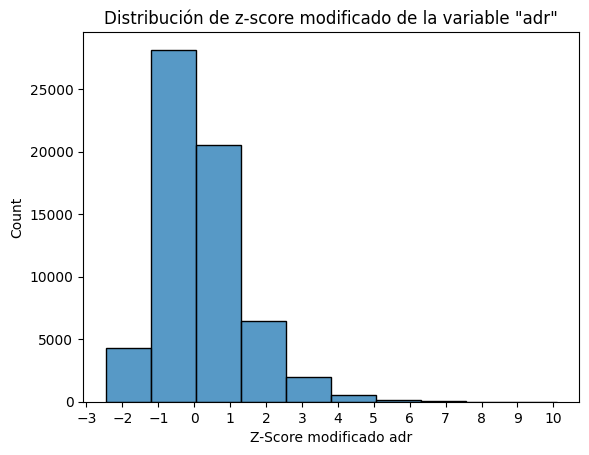

In [169]:
sns.histplot(hotel_cpy.zm_adr, bins=10).set(title='Distribución de z-score modificado de la variable "adr"', xlabel='Z-Score modificado adr')

plt.xticks(np.arange(-3, 11, 1))

plt.show()

Confirmamos entonces que la variable ``'adr'`` tiene outliers superiores pero no inferiores.

Procedemos a hacer la deteccion de outliers en las demás variables de la misma forma.

<Axes: ylabel='children'>

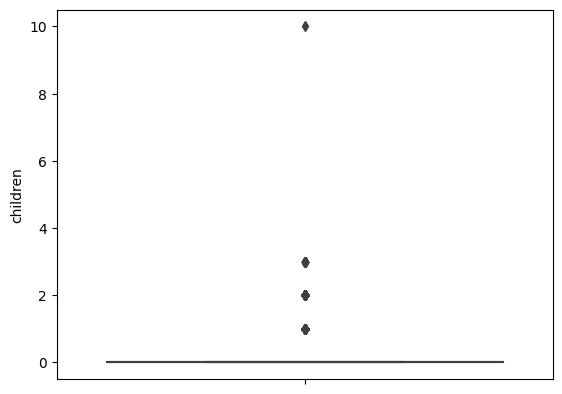

In [170]:
sns.boxplot(y=hotel.children)

In [171]:
hotel.children.agg(['min','max']).reset_index()

,index,children
0,min,0.0
1,max,10.0


In [172]:
#z-score
media_children =  np.mean(hotel_cpy.children)
std_children = np.std(hotel_cpy.children)
hotel_cpy['z_children'] = (hotel_cpy.children - media_children)/std_children

In [173]:
hotel_cpy[hotel_cpy['z_children']>3].sort_values(by='z_children', ascending=False)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children
49181,Resort Hotel,55,29,4,10,2,10.0,0,BB,PRT,...,0,Contract,133.16,0,1,1,2015-07-12,0.644366,0.927863,24.563104
61903,City Hotel,140,26,0,3,2,3.0,0,BB,NOR,...,0,Transient,220.00,0,0,0,2017-06-28,2.462825,3.039384,7.186660
11077,City Hotel,11,28,1,0,2,3.0,0,BB,USA,...,0,Transient,267.00,0,3,0,2016-07-04,3.447021,4.182192,7.186660
17732,Resort Hotel,8,26,0,2,2,3.0,0,BB,USA,...,0,Transient,186.00,1,0,0,2016-06-23,1.750854,2.212671,7.186660
29295,City Hotel,109,26,2,1,2,3.0,0,BB,CN,...,0,Transient,255.00,0,3,1,2017-06-25,3.195737,3.890411,7.186660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,City Hotel,37,22,1,2,2,2.0,0,BB,GBR,...,0,Transient,270.00,0,0,1,2017-05-29,3.509842,4.255137,4.704310
21153,City Hotel,179,14,1,2,0,2.0,0,BB,ESP,...,0,Transient,110.68,0,1,1,2017-04-07,0.173627,0.381260,4.704310
21144,City Hotel,56,52,1,0,2,2.0,0,BB,AUT,...,0,Transient,156.60,0,1,1,2016-12-19,1.135208,1.497808,4.704310
21128,City Hotel,40,37,2,5,0,2.0,0,BB,DEU,...,0,Transient,106.90,0,0,1,2016-09-04,0.094473,0.289349,4.704310


In [174]:
hotel_cpy[hotel_cpy['z_children']<3]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,0,Transient,115.50,0,1,1,2016-09-05,0.274560,0.498459,-0.260388
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,0,Transient,42.00,1,0,0,2015-10-31,-1.264555,-1.288699,-0.260388
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,0,Transient,75.00,0,0,1,2016-12-12,-0.573524,-0.486301,-0.260388
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,0,Transient-Party,75.00,0,1,0,2017-03-19,-0.573524,-0.486301,-0.260388
5,City Hotel,1,38,3,5,1,0.0,0,BB,AGO,...,0,Transient,133.00,0,0,0,2015-09-14,0.641016,0.923973,-0.260388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,4,0,2,2,0.0,0,BB,ESP,...,0,Transient,48.00,0,1,1,2017-01-27,-1.138913,-1.142808,-0.260388
61909,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,0,Transient,149.00,0,0,0,2016-09-02,0.976061,1.313014,-0.260388
61910,City Hotel,10,19,1,2,1,0.0,0,BB,FRA,...,0,Transient,95.00,0,0,0,2017-05-08,-0.154717,0.000000,-0.260388
61911,Resort Hotel,143,41,2,5,2,0.0,0,BB,PRT,...,0,Transient,36.05,0,0,1,2015-10-10,-1.389150,-1.433373,-0.260388


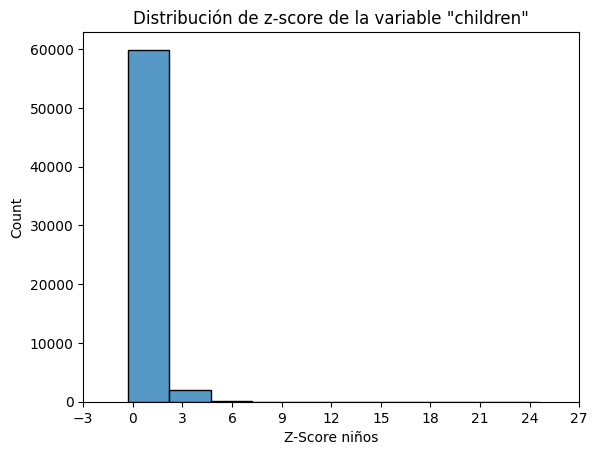

In [175]:
sns.histplot(hotel_cpy.z_children, bins=10).set(title='Distribución de z-score de la variable "children"', xlabel='Z-Score niños')

plt.xticks(np.arange(-3, 30, 3))

plt.show()

In [176]:
#z-score modificado
mediana_children = np.median(hotel_cpy.children)
MAD = np.median(np.absolute(hotel_cpy.children-mediana_children))
hotel_cpy['zm_children'] = (hotel_cpy.children - mediana_children)*0.6745/MAD

In [177]:
hotel_cpy[hotel_cpy['zm_children']>3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,Transient,229.00,0,2,0,2016-10-13,2.651288,3.258219,4.704310,inf
53,City Hotel,225,53,2,3,2,1.0,0,SC,GBR,...,Transient,71.91,0,0,1,2016-12-29,-0.638230,-0.561435,2.221961,inf
71,Resort Hotel,4,27,0,2,2,2.0,0,BB,ESP,...,Transient,201.00,1,0,0,2016-07-01,2.064959,2.577397,4.704310,inf
93,City Hotel,31,33,1,0,2,1.0,0,BB,FRA,...,Transient,200.00,0,3,0,2017-08-13,2.044019,2.553082,2.221961,inf
96,City Hotel,23,21,2,4,0,2.0,0,BB,IND,...,Transient,128.49,0,0,1,2016-05-21,0.546575,0.814312,4.704310,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61886,City Hotel,148,29,0,3,2,1.0,0,BB,ITA,...,Transient,118.10,1,2,0,2017-07-19,0.329005,0.561678,2.221961,inf
61889,City Hotel,4,6,0,2,3,2.0,0,BB,PRT,...,Transient,263.00,0,0,1,2017-02-10,3.363260,4.084932,4.704310,inf
61902,City Hotel,9,17,1,2,2,1.0,0,BB,BRA,...,Transient,149.00,0,0,1,2016-04-22,0.976061,1.313014,2.221961,inf
61903,City Hotel,140,26,0,3,2,3.0,0,BB,NOR,...,Transient,220.00,0,0,0,2017-06-28,2.462825,3.039384,7.186660,inf


In [178]:
hotel_cpy[hotel_cpy['zm_children']<3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children


Podemos ver que la variable ``'children'`` tiene outliers moderados pero no severos.

<Axes: ylabel='babies'>

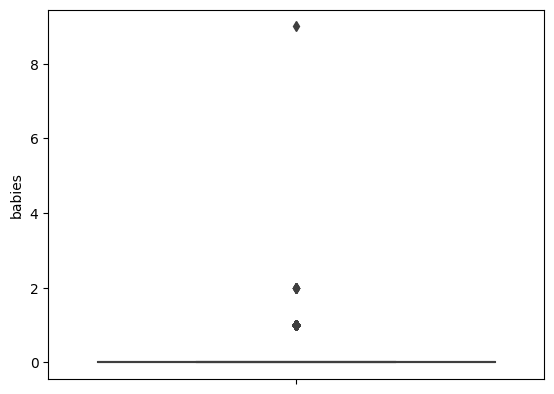

In [179]:
sns.boxplot(y=hotel.babies)

In [180]:
hotel.babies.agg(['min','max']).reset_index()

,index,babies
0,min,0
1,max,9


In [181]:
#z-score
media_babies = np.mean(hotel_cpy.babies)
std_babies = np.std(hotel_cpy.babies)
hotel_cpy['z_babies'] = (hotel_cpy.babies - media_babies)/std_babies

In [182]:
hotel_cpy[hotel_cpy['z_babies']>3].sort_values(by='z_babies', ascending=False)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies
12659,City Hotel,11,42,2,1,1,0.0,9,BB,GBR,...,95.00,0,0,0,2015-10-11,-0.154717,0.000000,-0.260388,NaN,97.577856
47646,Resort Hotel,345,36,2,7,2,0.0,2,BB,PRT,...,145.00,0,1,1,2016-09-01,0.892300,1.215753,-0.260388,NaN,21.623579
6675,City Hotel,13,11,0,1,2,1.0,2,BB,PRT,...,152.00,1,2,0,2017-03-18,1.038882,1.385959,2.221961,inf,21.623579
47353,City Hotel,11,39,0,2,2,0.0,2,BB,PRT,...,248.00,0,2,0,2016-09-20,3.049155,3.720205,-0.260388,NaN,21.623579
50487,Resort Hotel,116,27,3,5,2,0.0,2,BB,PRT,...,145.88,0,0,1,2016-06-26,0.910727,1.237151,-0.260388,NaN,21.623579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20534,Resort Hotel,197,32,2,4,2,0.0,1,BB,ESP,...,148.00,0,1,0,2016-08-05,0.955121,1.288699,-0.260388,NaN,10.772968
20232,Resort Hotel,124,21,0,4,2,0.0,1,BB,IRL,...,60.00,0,2,0,2016-05-18,-0.887629,-0.851027,-0.260388,NaN,10.772968
19740,Resort Hotel,1,5,0,1,2,0.0,1,BB,PRT,...,55.00,1,0,0,2017-02-04,-0.992331,-0.972603,-0.260388,NaN,10.772968
19480,Resort Hotel,13,24,0,4,2,1.0,1,BB,PRT,...,166.00,1,1,0,2016-06-08,1.332047,1.726370,2.221961,inf,10.772968


In [183]:
hotel_cpy[hotel_cpy['z_babies']<3]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,115.50,0,1,1,2016-09-05,0.274560,0.498459,-0.260388,NaN,-0.077643
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,42.00,1,0,0,2015-10-31,-1.264555,-1.288699,-0.260388,NaN,-0.077643
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,229.00,0,2,0,2016-10-13,2.651288,3.258219,4.704310,inf,-0.077643
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,75.00,0,0,1,2016-12-12,-0.573524,-0.486301,-0.260388,NaN,-0.077643
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,75.00,0,1,0,2017-03-19,-0.573524,-0.486301,-0.260388,NaN,-0.077643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,4,0,2,2,0.0,0,BB,ESP,...,48.00,0,1,1,2017-01-27,-1.138913,-1.142808,-0.260388,NaN,-0.077643
61909,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,149.00,0,0,0,2016-09-02,0.976061,1.313014,-0.260388,NaN,-0.077643
61910,City Hotel,10,19,1,2,1,0.0,0,BB,FRA,...,95.00,0,0,0,2017-05-08,-0.154717,0.000000,-0.260388,NaN,-0.077643
61911,Resort Hotel,143,41,2,5,2,0.0,0,BB,PRT,...,36.05,0,0,1,2015-10-10,-1.389150,-1.433373,-0.260388,NaN,-0.077643


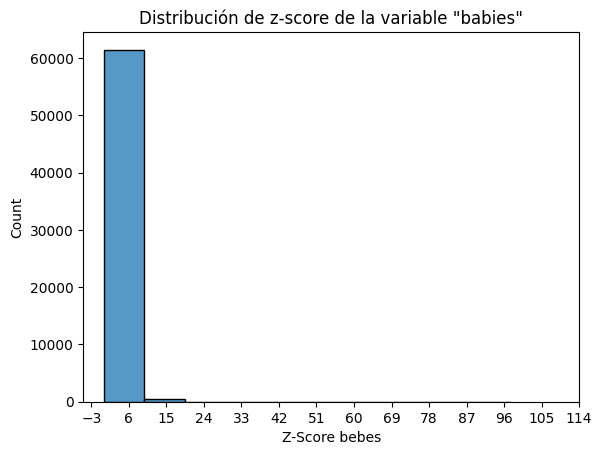

In [184]:
sns.histplot(hotel_cpy.z_babies, bins=10).set(title='Distribución de z-score de la variable "babies"', xlabel='Z-Score bebes')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

In [185]:
#z-score modificado
mediana_babies = np.median(hotel_cpy.babies)
MAD = np.median(np.absolute(hotel_cpy.babies-mediana_babies))
hotel_cpy['zm_babies'] = (hotel_cpy.babies - mediana_babies)*0.6745/MAD

In [186]:
hotel_cpy[hotel_cpy['zm_babies']>3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies
147,Resort Hotel,60,29,2,2,2,0.0,1,BB,FIN,...,0,2,0,2015-07-12,0.096567,0.291781,-0.260388,NaN,10.772968,inf
184,Resort Hotel,93,52,2,3,2,0.0,1,BB,PRT,...,0,1,0,2015-12-26,-1.130118,-1.132596,-0.260388,NaN,10.772968,inf
262,City Hotel,88,53,0,4,2,0.0,1,BB,PRT,...,0,1,1,2015-12-29,-0.235128,-0.093370,-0.260388,NaN,10.772968,inf
621,City Hotel,1,28,0,1,3,0.0,1,BB,PRT,...,2,1,0,2017-07-13,3.782067,4.571233,-0.260388,NaN,10.772968,inf
704,City Hotel,4,47,0,1,2,0.0,1,BB,PRT,...,1,2,0,2016-11-19,-0.070956,0.097260,-0.260388,NaN,10.772968,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61454,City Hotel,18,44,0,4,2,1.0,1,BB,PRT,...,0,1,0,2015-10-28,0.609605,0.887500,2.221961,inf,10.772968,inf
61597,City Hotel,44,28,0,1,2,1.0,1,BB,ROU,...,0,1,0,2016-07-09,0.607511,0.885068,2.221961,inf,10.772968,inf
61632,Resort Hotel,18,50,1,0,2,0.0,1,HB,ESP,...,0,2,0,2015-12-07,-0.196598,-0.048630,-0.260388,NaN,10.772968,inf
61637,Resort Hotel,117,20,2,5,2,0.0,1,BB,PRT,...,0,2,1,2016-05-14,-0.615405,-0.534932,-0.260388,NaN,10.772968,inf


In [187]:
hotel_cpy[hotel_cpy['zm_babies']<3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies


El zscore modificado me dio infinito en este caso, se puede deber a que el valor de MAD haya dado cero por la cantidad de valores iguales que hay en la variable. Por lo tanto, no me es útil para detectar outliers en esta variable.

<Axes: ylabel='adults'>

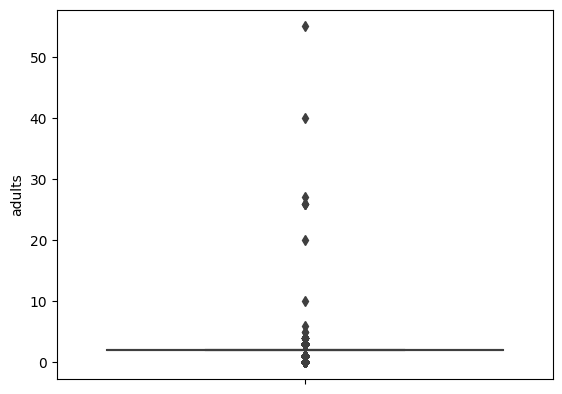

In [188]:
sns.boxplot(y=hotel.adults)

In [189]:
hotel.adults.agg(['min','max']).reset_index()

,index,adults
0,min,0
1,max,55


In [190]:
#z-score
media_adults = np.mean(hotel_cpy.adults)
std_adults = np.std(hotel_cpy.adults)
hotel_cpy['z_adults'] = (hotel_cpy.adults - media_adults)/std_adults

In [191]:
hotel_cpy[hotel_cpy['z_adults']>3].sort_values(by='z_adults', ascending=False)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies,z_adults
59165,Resort Hotel,338,41,2,0,55,0.0,0,HB,PRT,...,0,1,2015-10-04,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,90.206503
4064,Resort Hotel,304,36,0,3,40,0.0,0,BB,PRT,...,0,1,2015-09-03,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,64.742295
55112,Resort Hotel,349,39,1,3,27,0.0,0,HB,PRT,...,0,1,2015-09-21,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,42.673316
38305,Resort Hotel,340,37,2,5,26,0.0,0,BB,PRT,...,0,1,2015-09-12,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,40.975702
59059,Resort Hotel,333,36,2,5,26,0.0,0,BB,PRT,...,0,1,2015-09-05,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,40.975702
19146,Resort Hotel,354,39,2,5,26,0.0,0,BB,PRT,...,0,1,2015-09-26,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,40.975702
11830,Resort Hotel,334,42,2,5,20,0.0,0,BB,PRT,...,0,1,2015-10-12,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,30.790019
35477,Resort Hotel,334,42,2,5,10,0.0,0,BB,PRT,...,0,1,2015-10-12,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,13.813880
13101,Resort Hotel,328,41,2,5,6,0.0,0,BB,PRT,...,0,1,2015-10-06,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,7.023425
3962,Resort Hotel,328,41,2,5,5,0.0,0,BB,PRT,...,0,1,2015-10-06,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,5.325811


In [192]:
hotel_cpy[hotel_cpy['z_adults']<3].sort_values(by='z_adults', ascending=True)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,total_of_special_requests,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies,z_adults
12066,City Hotel,137,2,2,2,0,2.0,0,BB,BEL,...,0,0,2017-01-13,-0.325172,-0.197925,4.704310,inf,-0.077643,NaN,-3.162258
46395,City Hotel,0,48,0,0,0,0.0,0,HB,PRT,...,0,0,2016-11-24,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,-3.162258
22730,City Hotel,0,52,0,0,0,0.0,0,BB,PRT,...,2,0,2016-12-21,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,-3.162258
12446,City Hotel,159,21,0,4,0,3.0,0,HB,FRA,...,0,0,2017-05-24,0.569819,0.841301,7.186660,inf,-0.077643,NaN,-3.162258
270,City Hotel,4,8,0,3,0,0.0,0,SC,PRT,...,0,1,2017-02-21,-2.144049,-2.309932,-0.260388,NaN,-0.077643,NaN,-3.162258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39224,Resort Hotel,94,24,0,2,3,0.0,0,BB,PRT,...,0,0,2016-06-10,1.269226,1.653425,-0.260388,NaN,-0.077643,NaN,1.930584
44710,Resort Hotel,231,38,0,5,3,0.0,0,BB,PRT,...,1,1,2015-09-15,-0.474267,-0.371048,-0.260388,NaN,-0.077643,NaN,1.930584
44713,Resort Hotel,69,44,2,4,3,1.0,0,BB,IRL,...,0,1,2016-10-27,0.285030,0.510616,2.221961,inf,-0.077643,NaN,1.930584
20213,City Hotel,29,31,0,3,3,0.0,0,BB,FRA,...,0,1,2017-08-01,2.064959,2.577397,-0.260388,NaN,-0.077643,NaN,1.930584


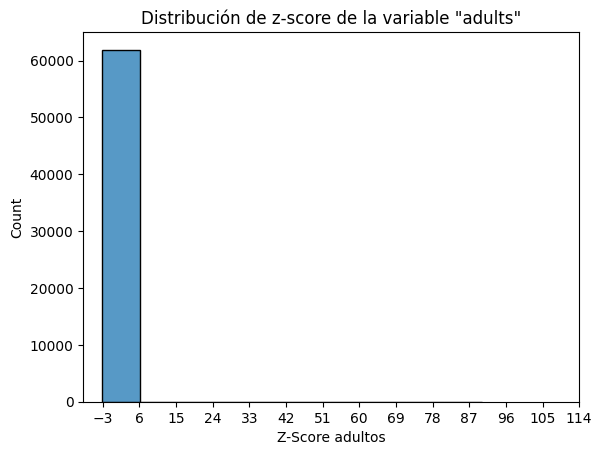

In [193]:
sns.histplot(hotel_cpy.z_adults, bins=10).set(title='Distribución de z-score de la variable "adults"', xlabel='Z-Score adultos')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

In [194]:
#z-score modificado
mediana_adults = np.median(hotel_cpy.adults)
MAD = np.median(np.absolute(hotel_cpy.adults-mediana_adults))
hotel_cpy['zm_adults'] = (hotel_cpy.adults - mediana_adults)*0.6745/MAD

In [195]:
hotel_cpy[hotel_cpy['zm_adults']>3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies,z_adults,zm_adults
26,City Hotel,315,15,0,3,3,0.0,0,BB,PRT,...,1,2017-04-13,0.888112,1.210890,-0.260388,NaN,-0.077643,NaN,1.930584,inf
40,City Hotel,86,27,1,0,3,0.0,0,BB,DEU,...,0,2017-07-03,1.834615,2.309932,-0.260388,NaN,-0.077643,NaN,1.930584,inf
80,City Hotel,200,39,1,5,3,0.0,0,BB,GBR,...,1,2016-09-20,1.006425,1.348271,-0.260388,NaN,-0.077643,NaN,1.930584,inf
83,Resort Hotel,364,42,0,4,3,0.0,0,BB,GBR,...,0,2016-10-12,-0.029075,0.145890,-0.260388,NaN,-0.077643,NaN,1.930584,inf
85,City Hotel,177,26,1,2,3,0.0,0,HB,FRA,...,1,2017-06-26,1.059823,1.410274,-0.260388,NaN,-0.077643,NaN,1.930584,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61881,City Hotel,32,10,2,7,3,0.0,0,BB,DEU,...,0,2017-03-10,0.608977,0.886771,-0.260388,NaN,-0.077643,NaN,1.930584,inf
61882,City Hotel,87,31,0,2,3,0.0,0,BB,CHE,...,0,2017-08-03,1.939317,2.431507,-0.260388,NaN,-0.077643,NaN,1.930584,inf
61889,City Hotel,4,6,0,2,3,2.0,0,BB,PRT,...,1,2017-02-10,3.363260,4.084932,4.704310,inf,-0.077643,NaN,1.930584,inf
61897,City Hotel,224,29,1,1,3,0.0,0,BB,CHE,...,0,2017-07-17,1.135208,1.497808,-0.260388,NaN,-0.077643,NaN,1.930584,inf


In [196]:
hotel_cpy[hotel_cpy['zm_adults']<3.5]

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,is_canceled,arrival_date,z_adr,zm_adr,z_children,zm_children,z_babies,zm_babies,z_adults,zm_adults
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,1,2016-09-05,0.274560,0.498459,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
5,City Hotel,1,38,3,5,1,0.0,0,BB,AGO,...,0,2015-09-14,0.641016,0.923973,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
11,City Hotel,349,41,1,5,1,0.0,0,BB,PRT,...,1,2016-10-04,-0.468822,-0.364726,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
13,City Hotel,41,38,0,3,1,0.0,0,BB,DEU,...,0,2016-09-14,0.117507,0.316096,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
25,City Hotel,8,7,0,2,1,0.0,0,BB,FRA,...,0,2017-02-15,-0.782927,-0.729452,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61901,City Hotel,351,40,2,2,1,0.0,0,BB,PRT,...,1,2015-10-03,-0.887629,-0.851027,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
61904,City Hotel,58,5,0,2,1,0.0,0,BB,PRT,...,1,2016-01-27,-0.468822,-0.364726,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
61907,City Hotel,296,39,0,4,1,0.0,0,HB,ITA,...,0,2016-09-21,-0.133777,0.024315,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf
61909,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,0,2016-09-02,0.976061,1.313014,-0.260388,NaN,-0.077643,NaN,-1.464644,-inf


<Axes: ylabel='previous_cancellations'>

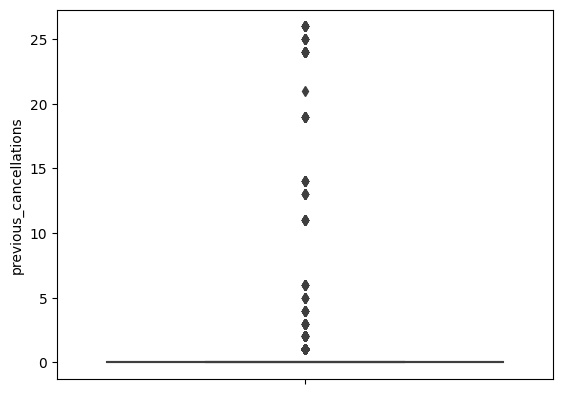

In [197]:
sns.boxplot(y=hotel.previous_cancellations)

In [198]:
hotel.agg(['min','max']).reset_index()

,index,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date
0,min,City Hotel,0,1,0,0,0,0.0,0,BB,...,A,0,No Deposit,0,Contract,-6.38,0,0,0,2015-07-01
1,max,Resort Hotel,629,53,16,40,55,10.0,9,Undefined,...,P,17,Refundable,391,Transient-Party,510.00,8,5,1,2017-08-31


##### Multivariada

Primero utiliaremos la distancia de Mahalanobis

#### Características

#### Tratamiento

## BORRADOR ///

In [199]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

is_canceled,0,1
days_in_waiting_list,,
0,30377,29297
1,4,2
2,3,1
3,0,41
4,9,6
...,...,...
236,13,3
259,5,0
330,6,1


In [200]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
adr,,
62.00,290,2106
90.00,420,1021
75.00,650,852
80.00,332,753
120.00,270,699
...,...,...
99.46,2,0
99.48,2,0
99.51,1,0


<Axes: xlabel='adr', ylabel='is_canceled'>

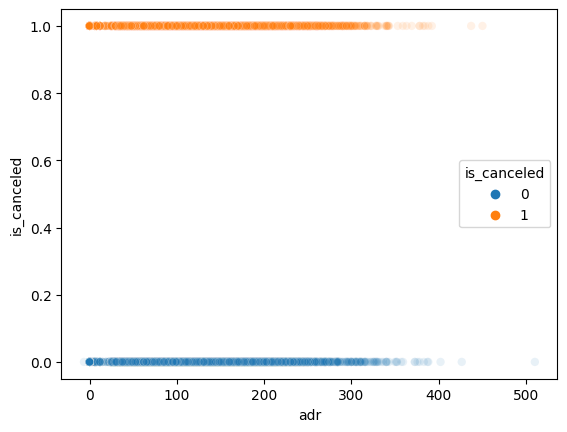

In [201]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [202]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
country,,
PRT,8724,19222
GBR,4040,1693
ESP,2681,1529
FRA,3469,1340
ITA,985,926
...,...,...
MCO,1,0
SDN,1,0
CUB,4,0


<Axes: xlabel='country'>

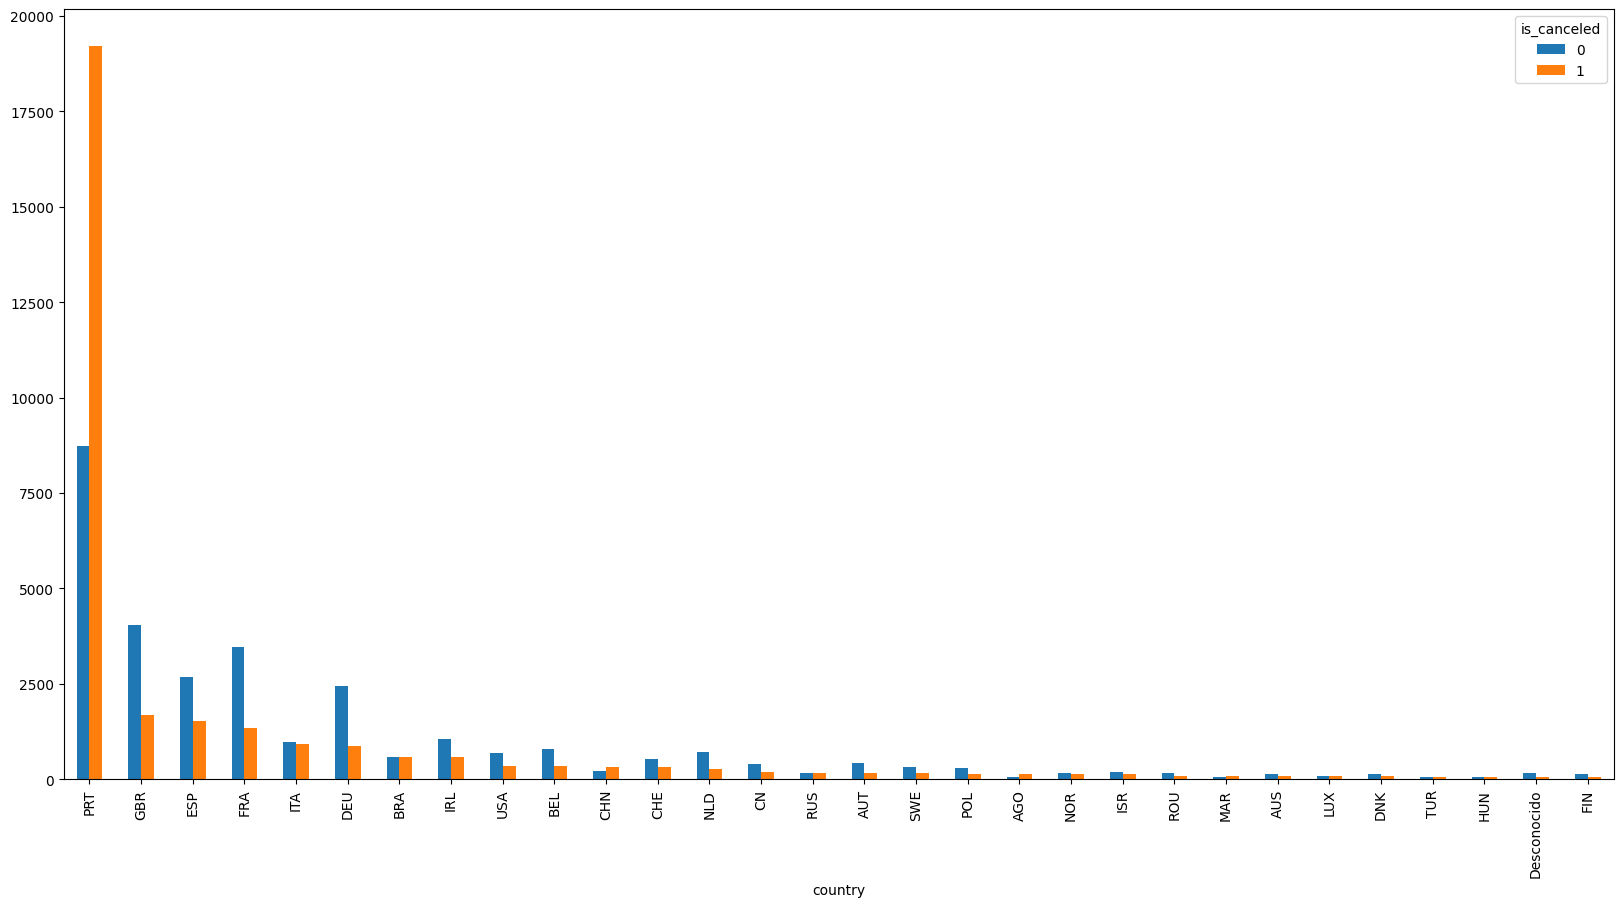

In [203]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [204]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


is_canceled,0,1
meal,,
BB,23693,24140
HB,3966,3486
SC,2785,2771
FB,144,333
Undefined,384,207


<Axes: xlabel='meal', ylabel='count'>

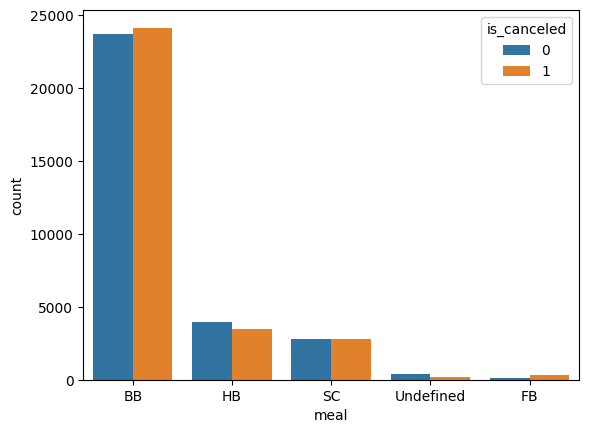

In [205]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [206]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
distribution_channel,,
TA/TO,23738,28111
Direct,5036,1763
Corporate,2135,1037
GDS,63,26


<Axes: xlabel='distribution_channel', ylabel='count'>

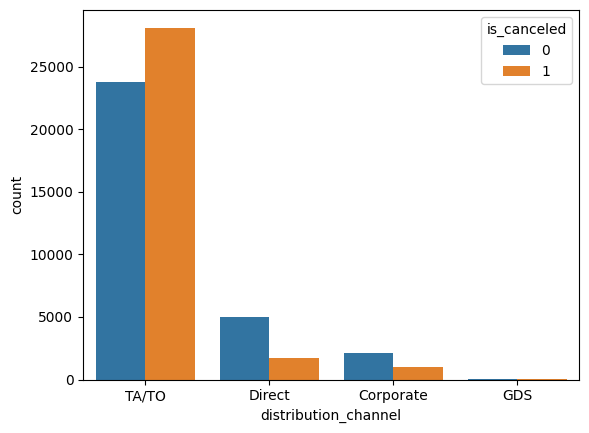

In [207]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

ModuleNotFoundError: No module named 'statsmodels'

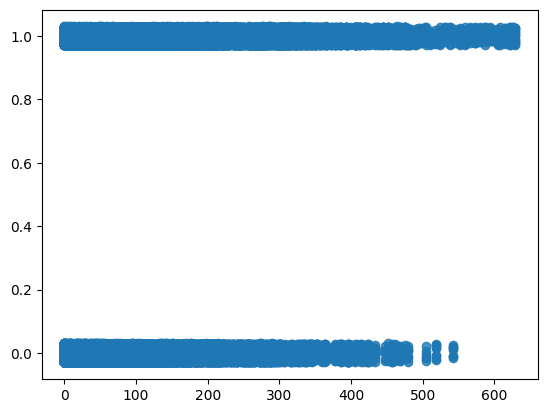

In [208]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [ ]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


In [ ]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

In [ ]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

In [ ]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [ ]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

In [ ]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

In [ ]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [ ]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = hotel_reducido.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = hotel_reducido.pivot_table(
    index='customer_type', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()


In [ ]:
# dropeamos company xq son la mayoria nulos
hotel_reducido.drop('company', axis=1, inplace=True)
hotel_reducido.info()

In [ ]:
# graficar relacion entre 20 agents mas comunes y 'is_canceled'
top_20_agents = hotel_reducido['agent'].value_counts().head(20).index
sns.countplot(x='agent', hue='is_canceled', data=hotel_reducido[hotel_reducido['agent'].isin(top_20_agents)])


In [ ]:
# graficar cantidad de bebes por reserva, sacando los registros con 0 'babies'
sns.countplot(x='babies', data=hotel_reducido[hotel_reducido['babies'] > 1])

In [ ]:
# graficar cantidad de 'children' por reserva
sns.countplot(x='children', data=hotel_reducido[hotel_reducido['children'] > 3])

Revisaremos entonces la distribución de agentes y compañías respecto al target del modelo, la columna ``is_canceled``.



In [ ]:
sns.countplot(y='company', data=hotel, hue='is_canceled',
              order=hotel['company'].value_counts().iloc[:30].index)

# Calculamos la cantidad de agentes y compañías únicos:
len(df['agent'].unique())

len(df['company'].unique())
# calcular cuantos valores unicos de 'company' hay ent
# graficar 'agent' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='agent', data=hotel, hue='is_canceled',
              order=hotel['agent'].value_counts().iloc[:30].index)

# create a new column 'is_used_agent' that is 1 if 'agent' is not null, 0 otherwise
_hotel = hotel.copy()
_hotel['is_used_agent'] = _hotel['agent'].notna().astype(int)
_hotel['is_used_agent'].value_counts()

# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()

# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()
